<a href="https://colab.research.google.com/github/DILEEPSAJJA/Speech_Emotion_Recognition-/blob/main/Copy_of_TESS_(LSTM%2C_BiLSTM%2C_GRU%2C_BiGRU).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# IMPORTANT: SOME KAGGLE DATA SOURCES ARE PRIVATE
# RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES.
import kagglehub
kagglehub.login()


Kaggle credentials set.
Kaggle credentials successfully validated.


In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

dmitrybabko_speech_emotion_recognition_en_path = kagglehub.dataset_download('dmitrybabko/speech-emotion-recognition-en')
dileepsajja_test_audio_path = kagglehub.dataset_download('dileepsajja/test-audio')

print('Data source import complete.')


100%|██████████| 22.9k/22.9k [00:00<00:00, 28.1MB/s]

Extracting files...
Data source import complete.


In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount = True)

Mounted at /content/drive


In [ ]:
!unzip /content/speech-emotion-recognition-en.zip

unzip:  cannot find or open /content/speech-emotion-recognition-en.zip, /content/speech-emotion-recognition-en.zip.zip or /content/speech-emotion-recognition-en.zip.ZIP.


In [ ]:
!pip install patool

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.3/86.3 kB 3.6 MB/s eta 0:00:00


In [ ]:
import patoolib
patoolib.extract_archive("/content/speech-emotion-recognition-en")

INFO patool: Extracting /content/speech-emotion-recognition-en ...
INFO:patool:Extracting /content/speech-emotion-recognition-en ...
INFO patool: Different MIME types detected for /content/speech-emotion-recognition-en: application/zip by file(1), None by extension. Preferring application/zip.
INFO:patool:Different MIME types detected for /content/speech-emotion-recognition-en: application/zip by file(1), None by extension. Preferring application/zip.
INFO patool: running /usr/bin/7z x -aou -o./Unpack_xneqoci9 -- /content/speech-emotion-recognition-en
INFO:patool:running /usr/bin/7z x -aou -o./Unpack_xneqoci9 -- /content/speech-emotion-recognition-en
INFO patool: ... /content/speech-emotion-recognition-en extracted to `speech-emotion-recognition-en1' (multiple files in root).
INFO:patool:... /content/speech-emotion-recognition-en extracted to `speech-emotion-recognition-en1' (multiple files in root).


'speech-emotion-recognition-en1'

## Import Libraries

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import librosa
import librosa.display

# to play the audio files
from IPython.display import Audio


from keras.callbacks import ModelCheckpoint
from keras.callbacks import LearningRateScheduler
import tensorflow as tf

from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from collections.abc import Iterable

from sklearn.preprocessing import OneHotEncoder
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, BatchNormalization
from keras import layers, callbacks

## Import Dataset

In [ ]:
!pip install kaggle

In [ ]:
!kaggle datasets download -d dmitrybabko/speech-emotion-recognition-en

Dataset URL: https://www.kaggle.com/datasets/dmitrybabko/speech-emotion-recognition-en
License(s): copyright-authors
 99% 981M/987M [00:05<00:00, 115MB/s]
100% 987M/987M [00:05<00:00, 176MB/s]


In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("dmitrybabko/speech-emotion-recognition-en")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/dmitrybabko/speech-emotion-recognition-en/versions/1


In [ ]:
Root_dir = '/root/.cache/kagglehub/datasets/dmitrybabko/speech-emotion-recognition-en/versions/1'

In [ ]:
Crema_path = Root_dir + "/Crema/"
Ravdess_path = Root_dir + "/Ravdess/audio_speech_actors_01-24/"
Savee_path = Root_dir + "/Savee/"
Tess_path = Root_dir + "/Tess/"

In [ ]:
Crema_dir_list = os.listdir(Crema_path)
Ravdess_dir_list = os.listdir(Ravdess_path)
Savee_dir_list = os.listdir(Savee_path)
Tess_dir_list = os.listdir(Tess_path)

## Data Preprocessing

In [ ]:
Ex_Tess_dir_list = Tess_dir_list[:15]
Ex_Tess_dir_list

['YAF_disgust',
 'OAF_Sad',
 'YAF_pleasant_surprised',
 'OAF_Pleasant_surprise',
 'OAF_angry',
 'YAF_fear',
 'OAF_neutral',
 'OAF_Fear',
 'YAF_neutral',
 'YAF_angry',
 'OAF_happy',
 'YAF_sad',
 'YAF_happy',
 'OAF_disgust']

In [ ]:
emotions_tess = []
path_tess = []

for it in Tess_dir_list:
    directories = os.listdir(Tess_path + '/' + it)
    for file in directories:
        part = file.split('.')[0]
        part = part.split('_')[2]
        if part=='ps':
            emotions_tess.append('surprise')
        else:
            emotions_tess.append(part)
        path_tess.append(Tess_path + it + '/' + file)



# dataframe for emotion of files
emotion_tess_df = pd.DataFrame(emotions_tess, columns=['Emotions'])

# dataframe for path of files.
path_tess_df = pd.DataFrame(path_tess, columns=['Path'])
Tess_df = pd.concat([emotion_tess_df, path_tess_df], axis=1)
Tess_df.head().style.set_properties(**{'background-color': '#9490ff',
                           'color': 'black',
                           'border-color': 'black'})

,Emotions,Path
0,disgust,/root/.cache/kagglehub/datasets/dmitrybabko/speech-emotion-recognition-en/versions/1/Tess/YAF_disgust/YAF_sell_disgust.wav
1,disgust,/root/.cache/kagglehub/datasets/dmitrybabko/speech-emotion-recognition-en/versions/1/Tess/YAF_disgust/YAF_reach_disgust.wav
2,disgust,/root/.cache/kagglehub/datasets/dmitrybabko/speech-emotion-recognition-en/versions/1/Tess/YAF_disgust/YAF_room_disgust.wav
3,disgust,/root/.cache/kagglehub/datasets/dmitrybabko/speech-emotion-recognition-en/versions/1/Tess/YAF_disgust/YAF_pike_disgust.wav
4,disgust,/root/.cache/kagglehub/datasets/dmitrybabko/speech-emotion-recognition-en/versions/1/Tess/YAF_disgust/YAF_ring_disgust.wav


In [ ]:
[Tess_df["Emotions"].unique().tolist() for i in Tess_df.columns]

[['disgust', 'sad', 'surprise', 'angry', 'fear', 'neutral', 'happy'],
 ['disgust', 'sad', 'surprise', 'angry', 'fear', 'neutral', 'happy']]

In [ ]:
font1 = {'family':'Times New Roman','color':'blue','size':30}
font2 = {'family':'Times New Roman','color':'blue','size':20}
font3 = {'family':'Times New Roman','color':'blue','size':10}

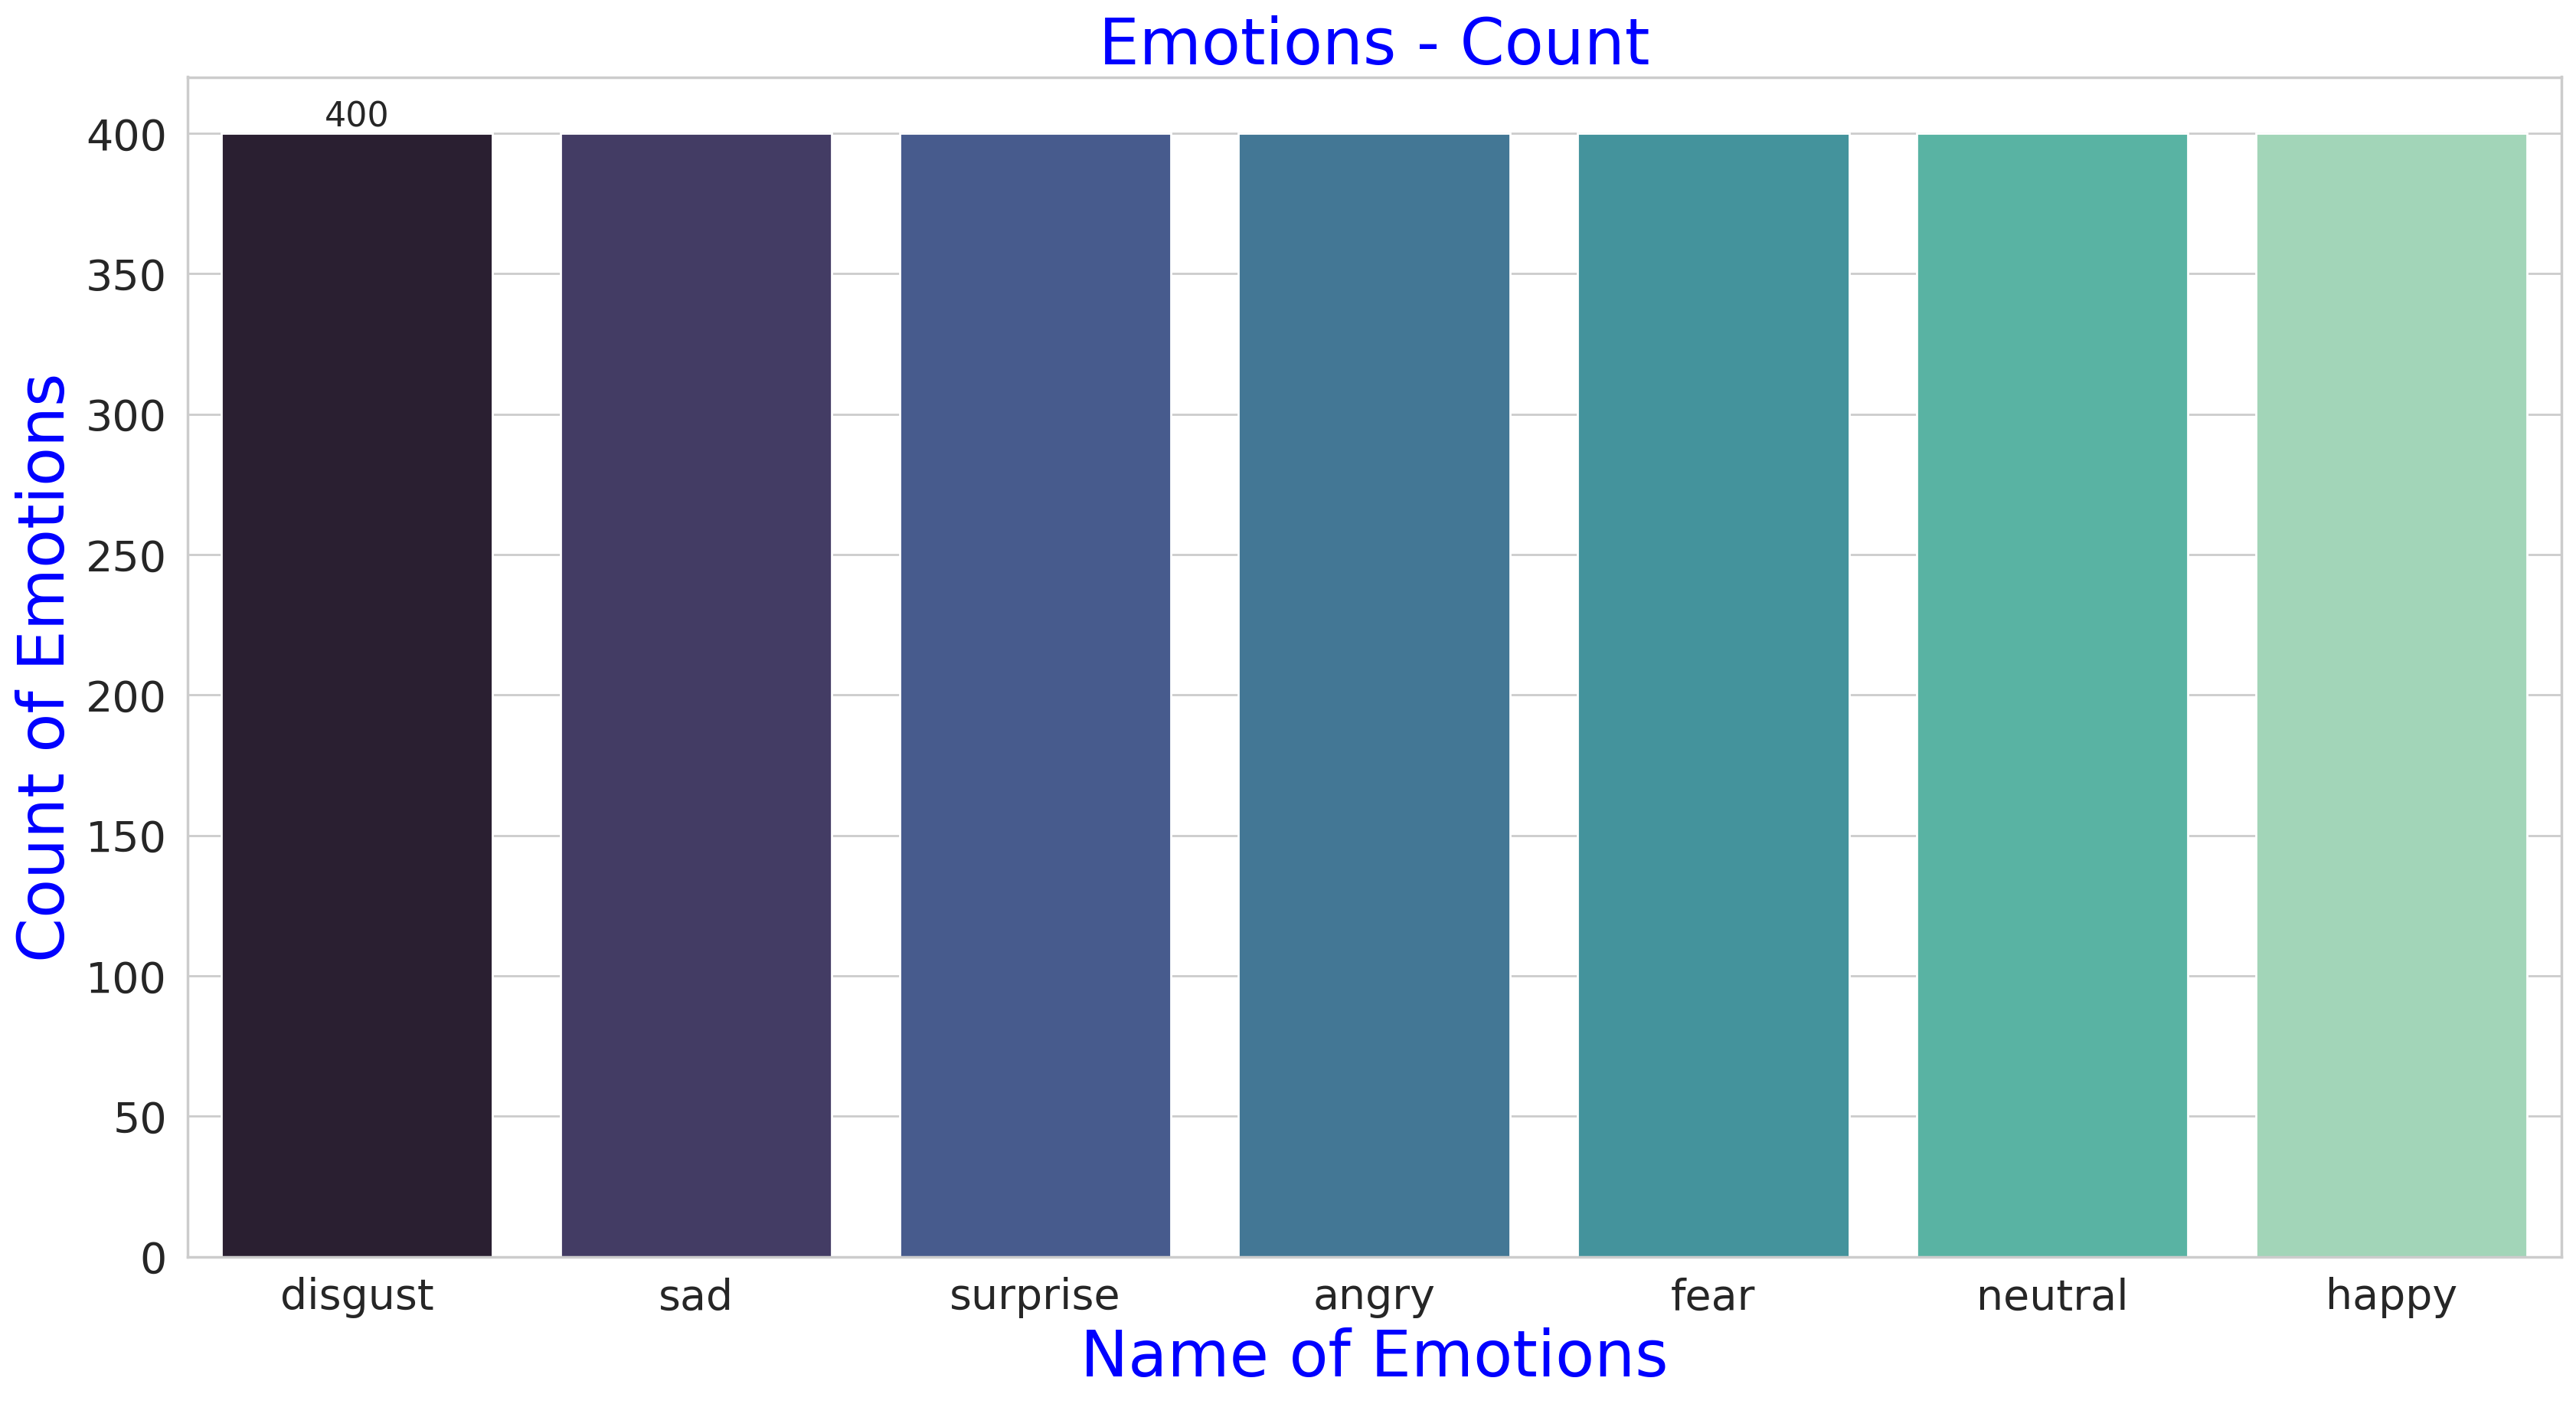

In [ ]:
sns.set(style="whitegrid", color_codes=True)
plt.figure(figsize=(20, 10), dpi=200)

# Calculate emotion counts
Count_emotion = Tess_df['Emotions'].value_counts()[:]

# Plot vertical bar plot
ax = sns.barplot(x=Count_emotion.index, y=Count_emotion, palette="mako")
ax.bar_label(ax.containers[0], fontsize=16)

# Update tick font sizes and labels
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel("Name of Emotions", fontdict=font1)
plt.ylabel("Count of Emotions", fontdict=font1)
plt.title("Emotions - Count", fontdict=font1)

# Display the plot
plt.show()

## Data Augmentation

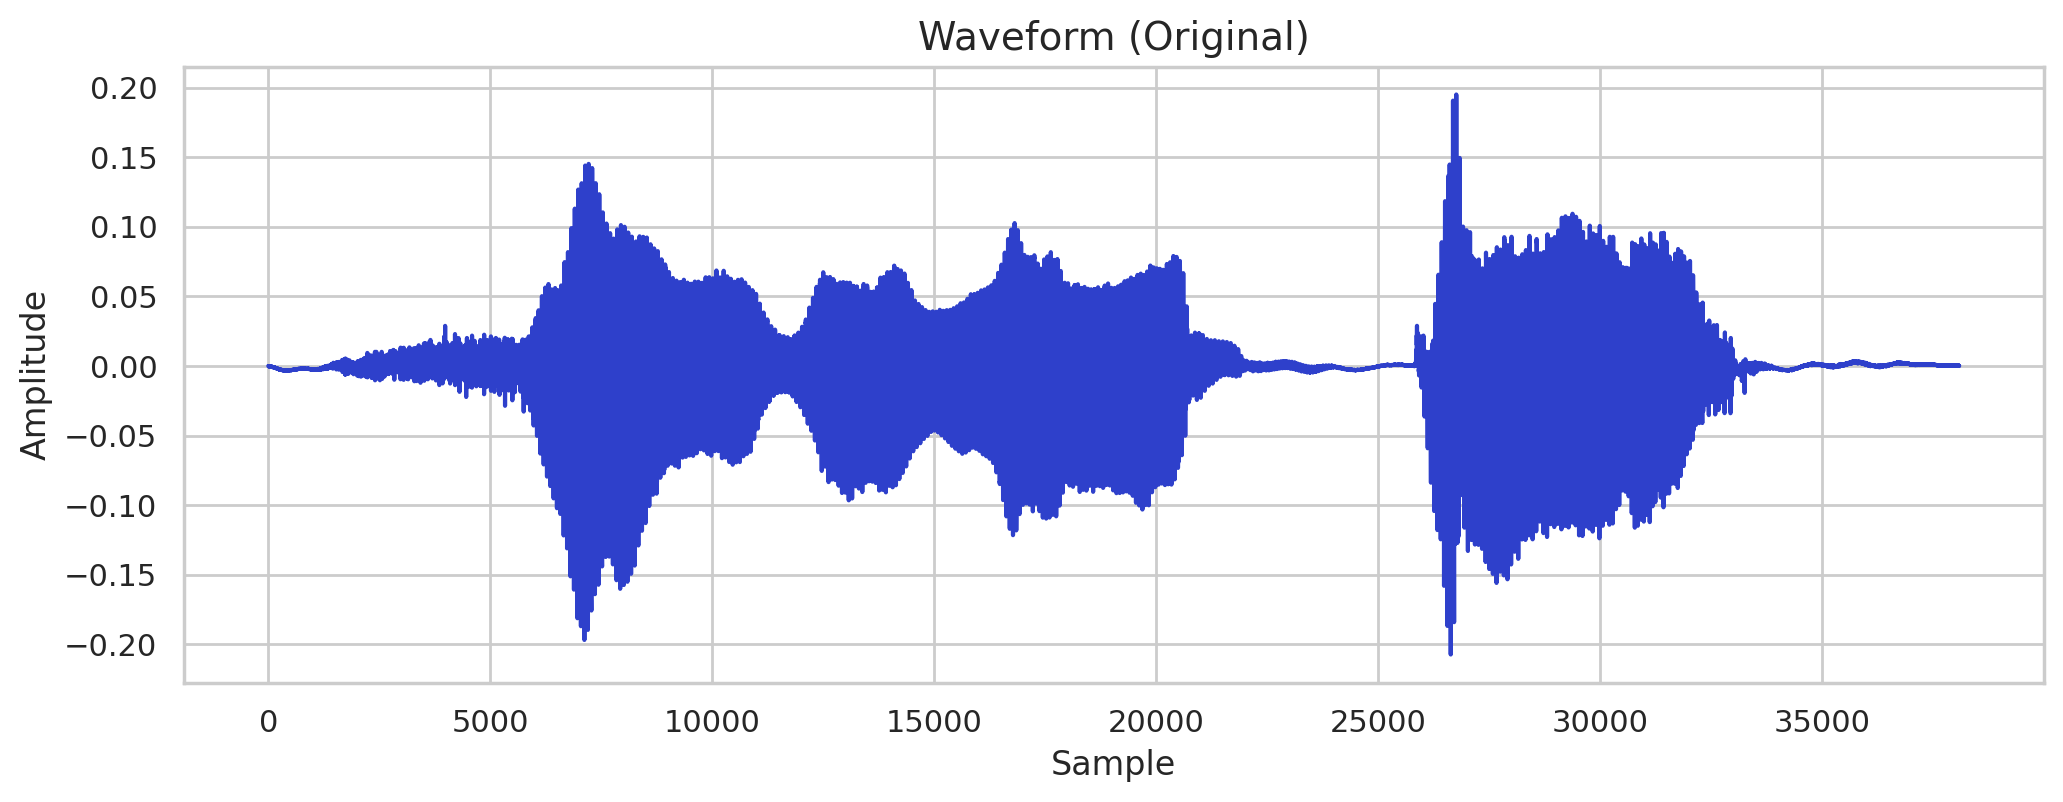

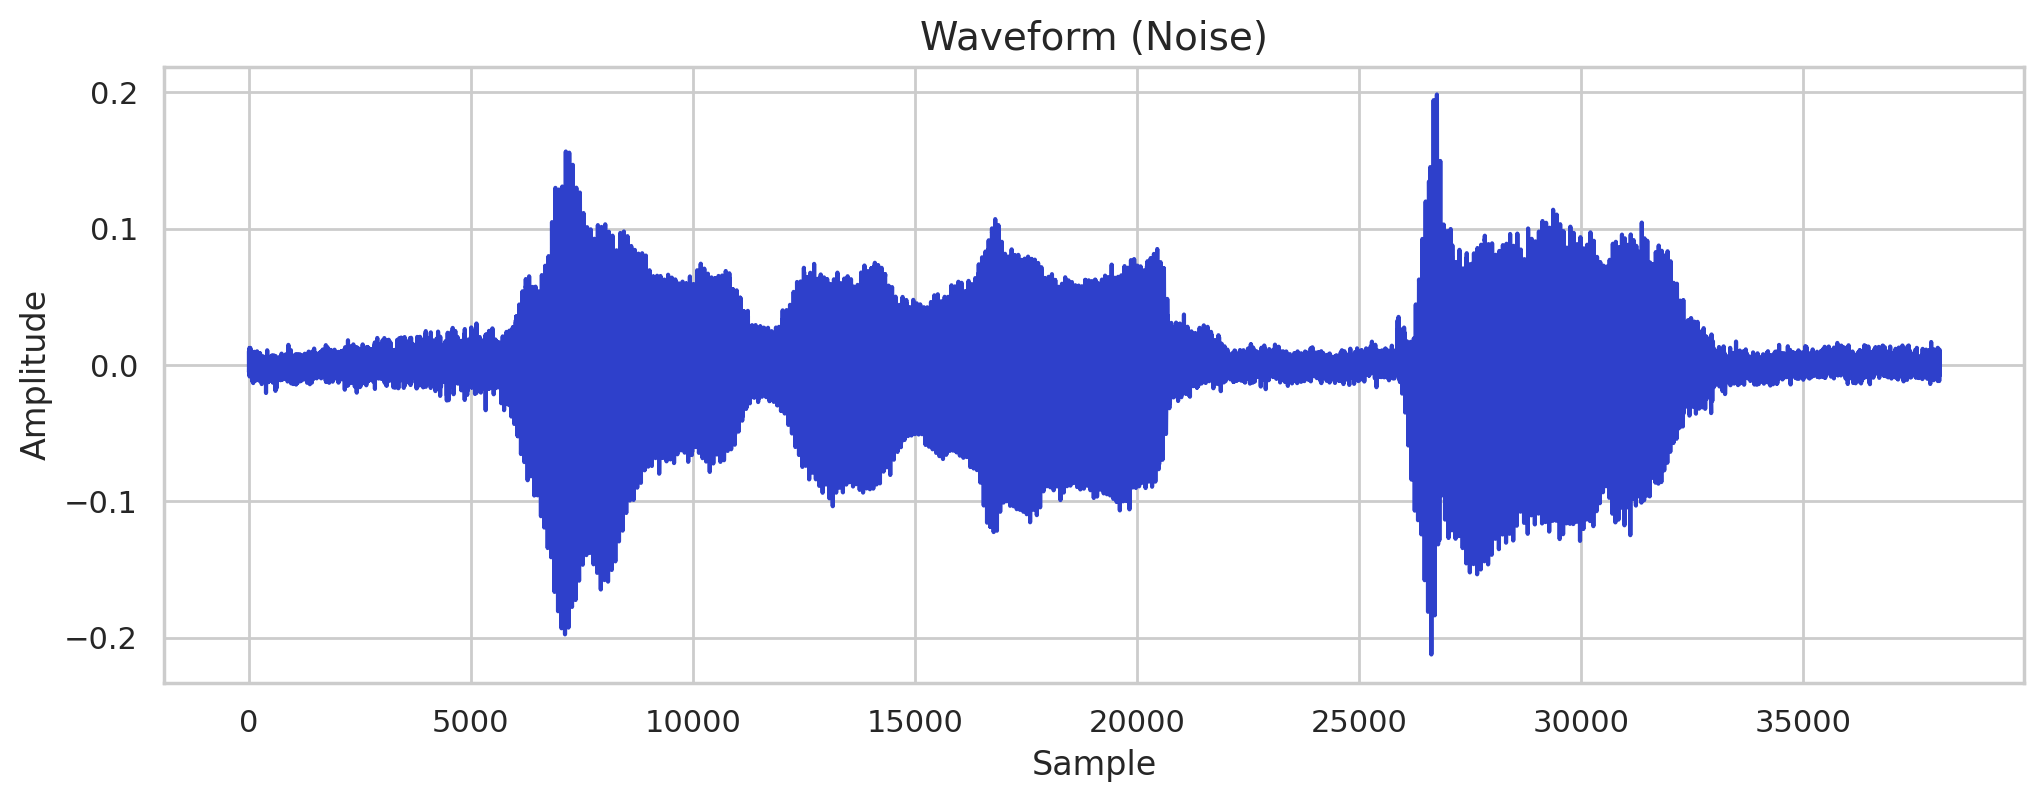

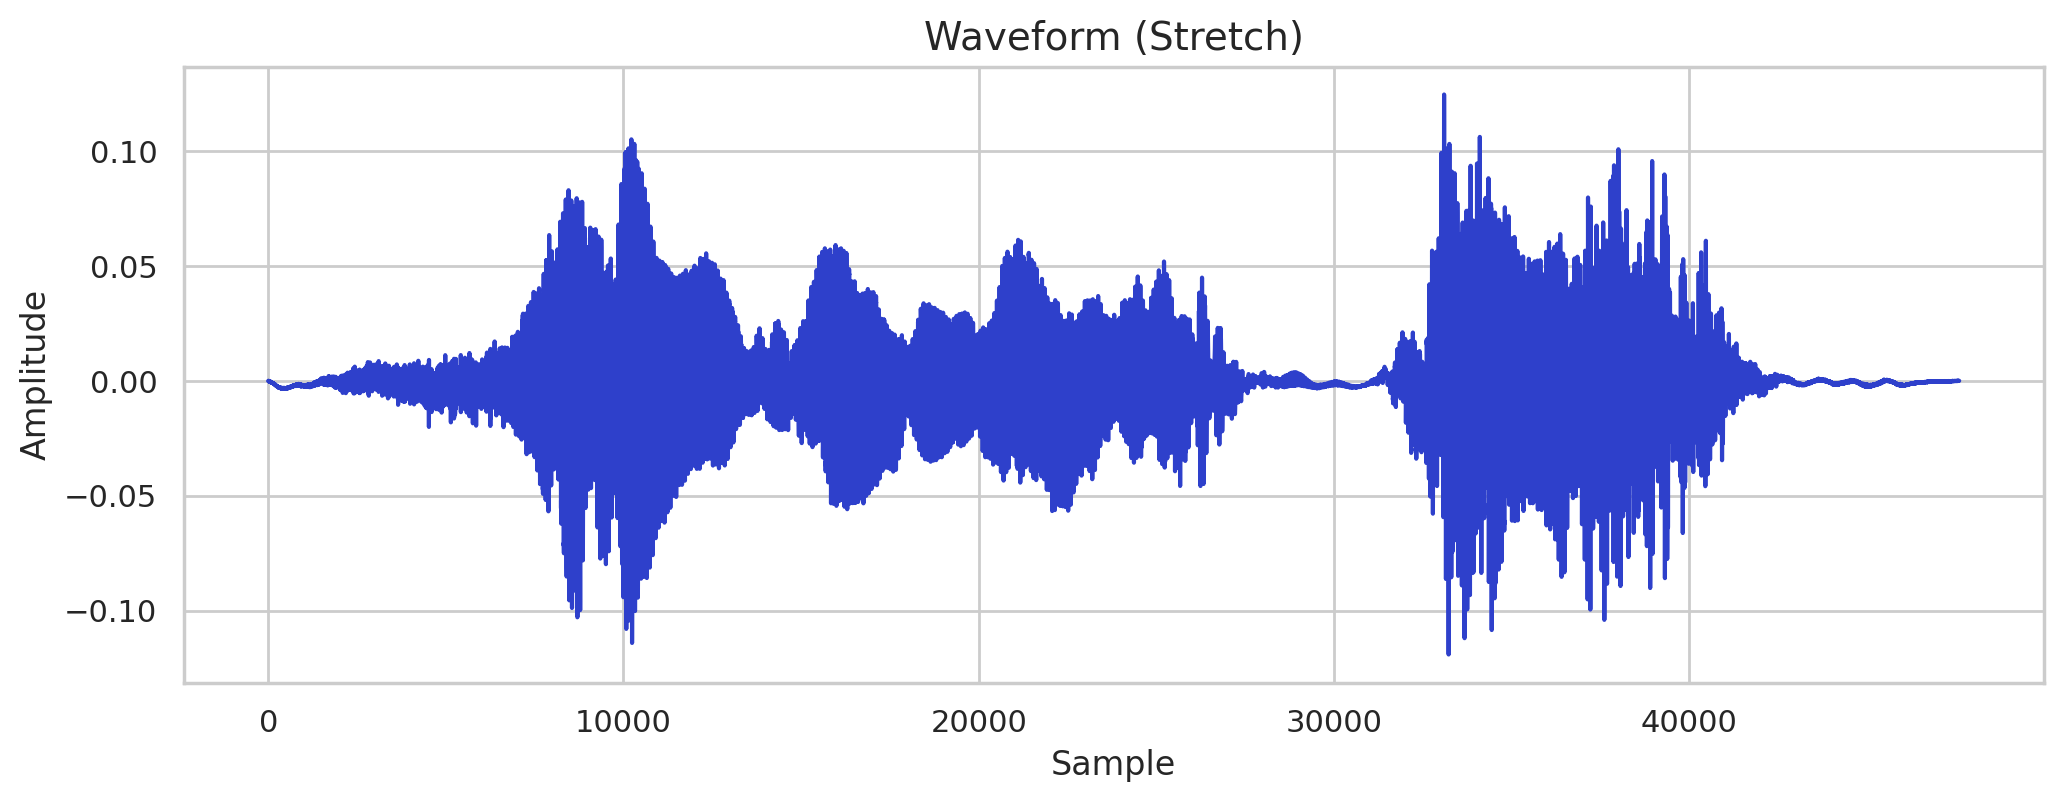

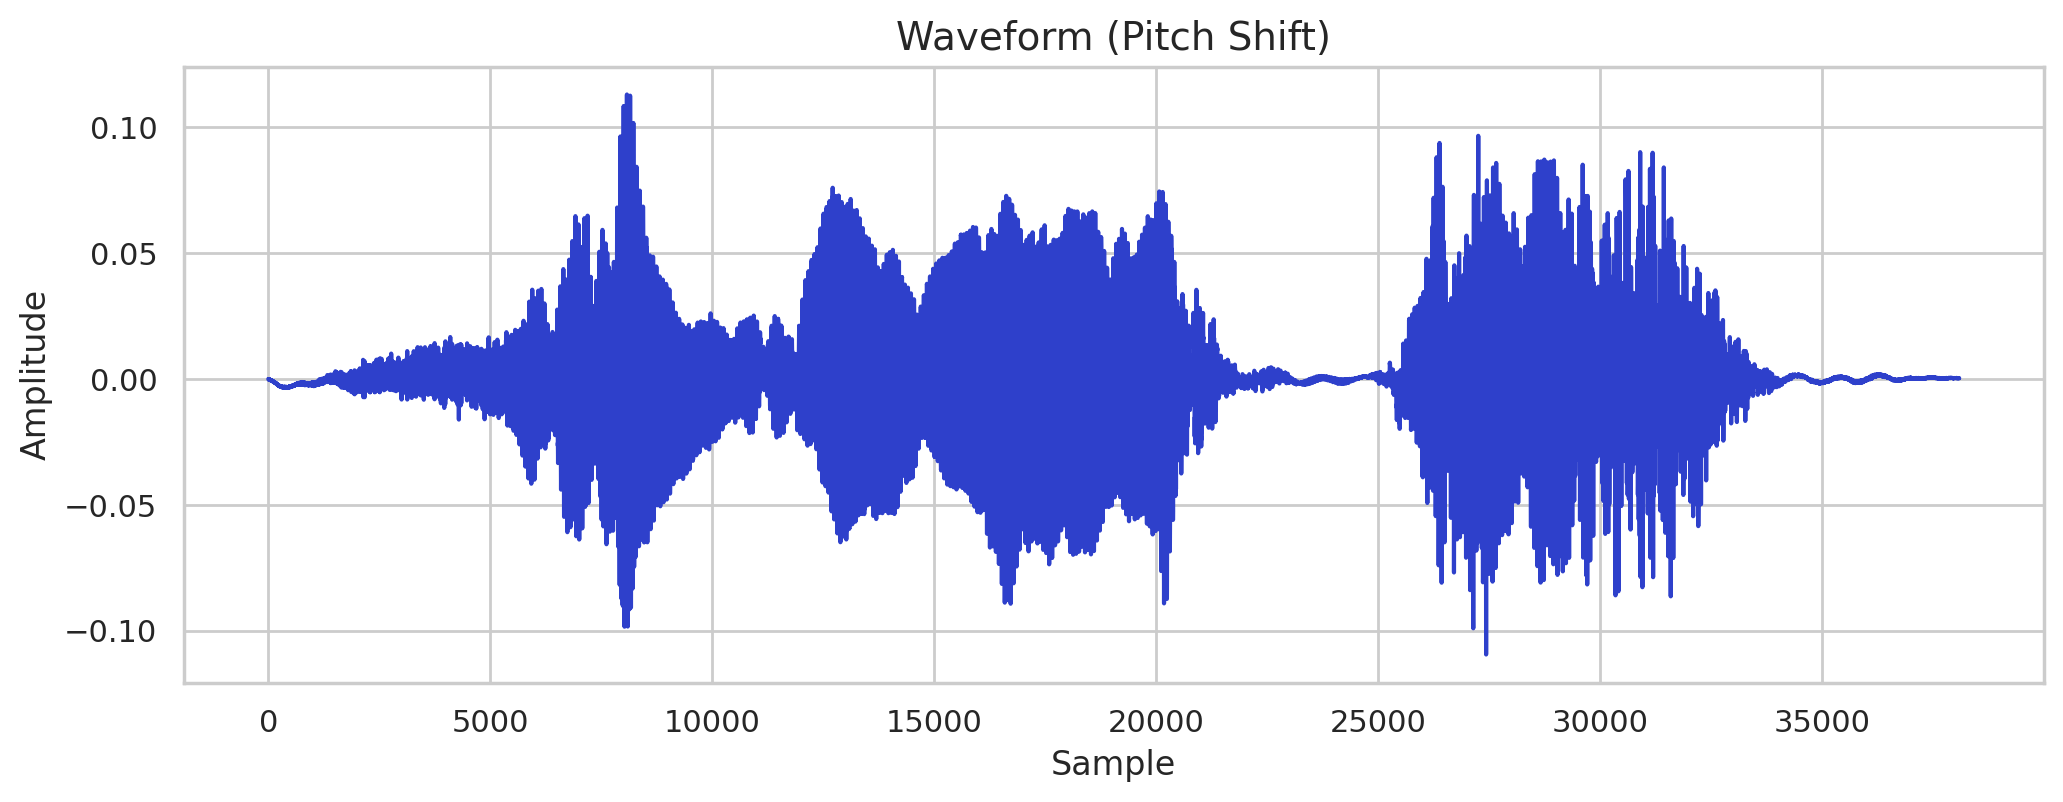

In [ ]:
import numpy as np
import librosa
import matplotlib.pyplot as plt
from IPython.display import Audio, display

def noise(data):
    """Add random noise to the audio signal."""
    noise_amp = 0.035 * np.random.uniform() * np.amax(data)
    data = data + noise_amp * np.random.normal(size=data.shape[0])
    return data

# Function for time stretching
def stretch(data, rate=0.8):
    return librosa.effects.time_stretch(data, rate=rate)

def apply_pitch_shift(data, sr, n_steps=2):
    """Apply pitch shift to the audio signal."""
    return librosa.effects.pitch_shift(y=data, sr=sr, n_steps=n_steps)


# Example usage: Load an audio file
path = '/root/.cache/kagglehub/datasets/dmitrybabko/speech-emotion-recognition-en/versions/1/Tess/OAF_Fear/OAF_back_fear.wav'  # Replace with your actual file path
data, sample_rate = librosa.load(path)

# Visualizing and listening to the original audio signal
plt.figure(figsize=(12, 4), dpi=200)
plt.plot(data, color='#2E40CB')
plt.xlabel('Sample', fontsize=12)
plt.ylabel('Amplitude', fontsize=12)
plt.title('Waveform (Original)', fontsize=14)
plt.show()

# Listen to the original audio
display(Audio(data, rate=sample_rate))

# Apply Noise augmentation
Noise_data = noise(data)
plt.figure(figsize=(12, 4), dpi=200)
plt.plot(Noise_data, color='#2E40CB')
plt.xlabel('Sample', fontsize=12)
plt.ylabel('Amplitude', fontsize=12)
plt.title('Waveform (Noise)', fontsize=14)
plt.show()

# Listen to the audio with noise
display(Audio(Noise_data, rate=sample_rate))

# Apply Time Stretching
Stretch_data = stretch(data, rate=0.8)  # You can change the rate as needed
plt.figure(figsize=(12, 4), dpi=200)
plt.plot(Stretch_data, color='#2E40CB')
plt.xlabel('Sample', fontsize=12)
plt.ylabel('Amplitude', fontsize=12)
plt.title('Waveform (Stretch)', fontsize=14)
plt.show()

# Listen to the stretched audio
display(Audio(Stretch_data, rate=sample_rate))

# Apply Pitch Shifting
Pitch_shifted_data = apply_pitch_shift(data, sample_rate, n_steps=2)
plt.figure(figsize=(12, 4), dpi=200)
plt.plot(Pitch_shifted_data, color='#2E40CB')
plt.xlabel('Sample', fontsize=12)
plt.ylabel('Amplitude', fontsize=12)
plt.title('Waveform (Pitch Shift)', fontsize=14)
plt.show()

# Listen to the pitch-shifted audio
display(Audio(Pitch_shifted_data, rate=sample_rate))

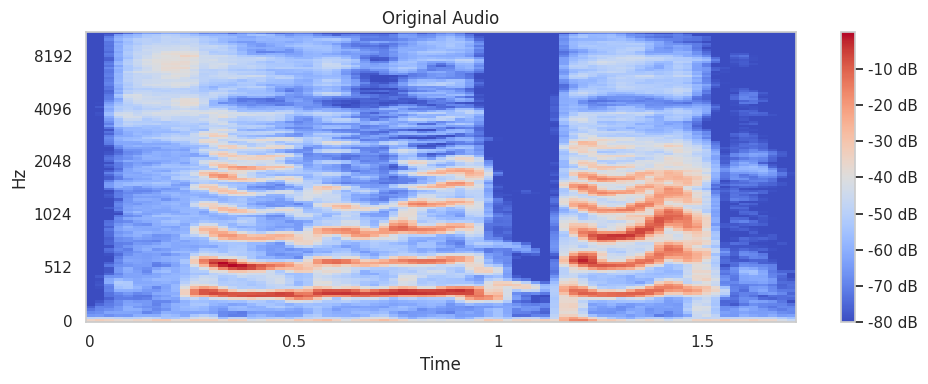

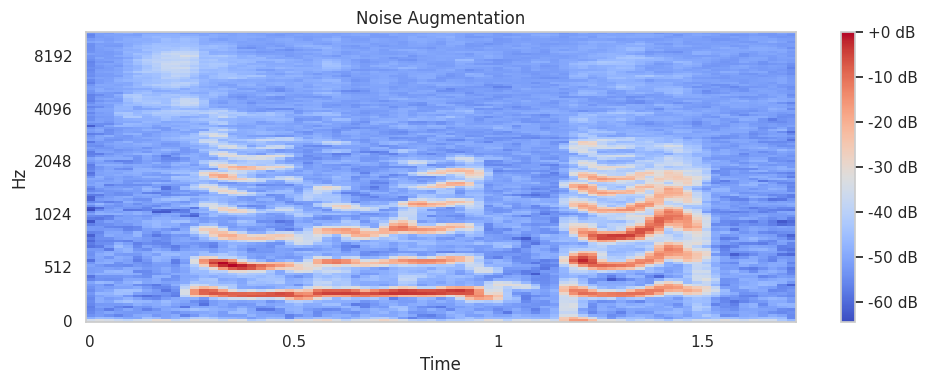

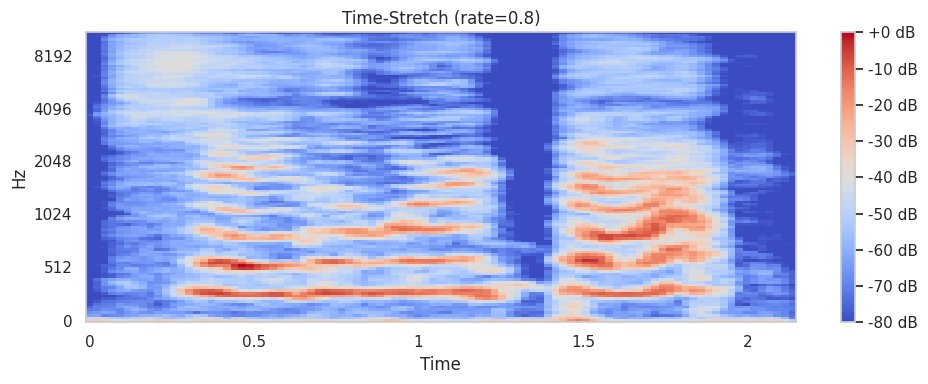

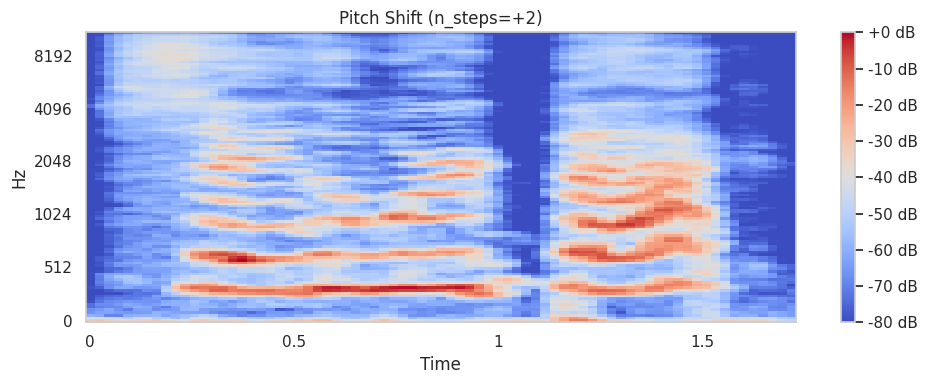

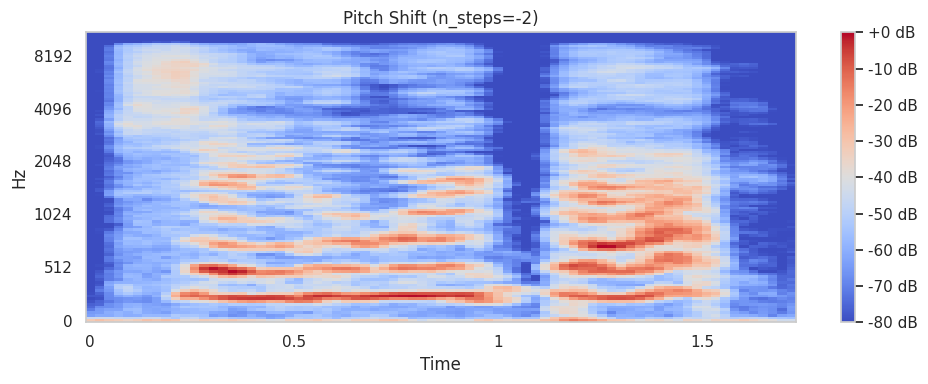

In [ ]:
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt

def plot_spectrogram(data, sr, title="Spectrogram"):
    """
    Plot the spectrogram for the given audio data.
    Args:
    - data: Audio signal
    - sr: Sampling rate
    - title: Title for the plot
    """
    spectrogram = librosa.feature.melspectrogram(y=data, sr=sr)
    log_spectrogram = librosa.power_to_db(spectrogram, ref=np.max)
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(log_spectrogram, x_axis="time", y_axis="mel", sr=sr, cmap="coolwarm")
    plt.colorbar(format="%+2.0f dB")
    plt.title(title)
    plt.tight_layout()
    plt.show()

def visualize_augmentations(data, sr):
    """
    Visualize the spectrograms for original and augmented audio data.
    Args:
    - data: Original audio signal
    - sr: Sampling rate
    """
    # Dictionary to hold augmented data with titles
    augmentations = {
        "Original Audio": data,
        "Noise Augmentation": noise(data),
        "Time-Stretch (rate=0.8)": stretch(data, rate=0.8),
        "Pitch Shift (n_steps=+2)": apply_pitch_shift(data, sr, n_steps=2),
        "Pitch Shift (n_steps=-2)": apply_pitch_shift(data, sr, n_steps=-2),
    }

    # Plot each augmentation's spectrogram
    for title, augmented_data in augmentations.items():
        plot_spectrogram(augmented_data, sr, title=title)

# Example: Load an audio file
path = '/root/.cache/kagglehub/datasets/dmitrybabko/speech-emotion-recognition-en/versions/1/Tess/OAF_Fear/OAF_back_fear.wav'  # Replace with your actual file path
data, sample_rate = librosa.load(path)

# Call the function to visualize augmentations
visualize_augmentations(data, sample_rate)

## Feature Extraction

In [ ]:
Tess_df

,Emotions,Path
0,disgust,/root/.cache/kagglehub/datasets/dmitrybabko/sp...
1,disgust,/root/.cache/kagglehub/datasets/dmitrybabko/sp...
2,disgust,/root/.cache/kagglehub/datasets/dmitrybabko/sp...
3,disgust,/root/.cache/kagglehub/datasets/dmitrybabko/sp...
4,disgust,/root/.cache/kagglehub/datasets/dmitrybabko/sp...
...,...,...
2795,disgust,/root/.cache/kagglehub/datasets/dmitrybabko/sp...
2796,disgust,/root/.cache/kagglehub/datasets/dmitrybabko/sp...
2797,disgust,/root/.cache/kagglehub/datasets/dmitrybabko/sp...
2798,disgust,/root/.cache/kagglehub/datasets/dmitrybabko/sp...


In [ ]:
def extract_mfcc(filename):
    y, sr = librosa.load(filename, duration = 3, offset = 0.5)
    mfcc = np.mean(librosa.feature.mfcc(y = y, sr = sr, n_mfcc = 40).T, axis = 0)
    return mfcc

extract_mfcc(Tess_df['Path'][0])

array([-3.6340253e+02,  9.5646332e+01,  2.0591562e+00,  8.7361393e+00,
       -2.2304110e+01, -2.5233839e+00, -2.9411299e+00, -1.5032224e+01,
       -7.1253009e+00,  1.1855727e+00, -1.0188379e+01,  2.3425186e+00,
       -8.9250937e+00, -9.2747867e-01, -5.4903884e+00, -6.7388635e+00,
       -2.8361344e+00, -3.2329533e+00, -6.7305684e+00, -1.9280256e+00,
       -7.4842963e+00, -2.3591194e+00, -3.6997766e+00,  2.8831387e+00,
       -5.1442270e+00,  1.2382505e+00, -3.9318833e+00,  1.6288608e-02,
        4.7524309e-01, -5.0869685e-01, -1.8067199e+00,  3.1438475e+00,
        1.6188898e+00,  4.9817405e+00,  3.6471214e+00,  2.2903519e+00,
        3.2005031e+00,  5.1033878e+00,  5.4528799e+00,  6.3904390e+00],
      dtype=float32)

In [ ]:
%%time
X_mfcc = Tess_df['Path'].apply(lambda x: extract_mfcc(x))

CPU times: user 27.3 s, sys: 20 s, total: 47.2 s
Wall time: 26.8 s


## Array and Dimension

In [ ]:
X = [x for x in X_mfcc]
X = np.array(X)
X.shape

(2800, 40)

In [ ]:
## input split
X = np.expand_dims(X, -1)
X.shape

(2800, 40, 1)

In [ ]:
enc = OneHotEncoder()
y = enc.fit_transform(Tess_df[['Emotions']])

In [ ]:
y = y.toarray()

## LSTM Model

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 256)                 │         264,192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 7)                   │             455 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 305,799 (1.17 MB)

 Trainable params: 305,799 (1.17 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/300
35/35 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - accuracy: 0.4333 - loss: 1.5007 - val_accuracy: 0.3750 - val_loss: 2.4757
Epoch 2/300
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8748 - loss: 0.3953 - val_accuracy: 0.3839 - val_loss: 2.9448
Epoch 3/300
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9440 - loss: 0.1799 - val_accuracy: 0.4804 - val_loss: 2.7595
Epoch 4/300
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9516 - loss: 0.1543 - val_accuracy: 0.3554 - val_loss: 3.9091
Epoch 5/300
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9550 - loss: 0.1337 - val_accuracy: 0.3375 - val_loss: 4.1842
Epoch 6/300
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9659 - loss: 0.1478 - val_accuracy: 0.3661 - val_loss: 3.6930
Epoch 7/300
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9838 - loss: 0.0573 - val_accuracy: 0.3964 - val_loss: 4.3089
Epoch 8/300
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9824 - loss: 0.0560 - val_accuracy: 0.4393 -

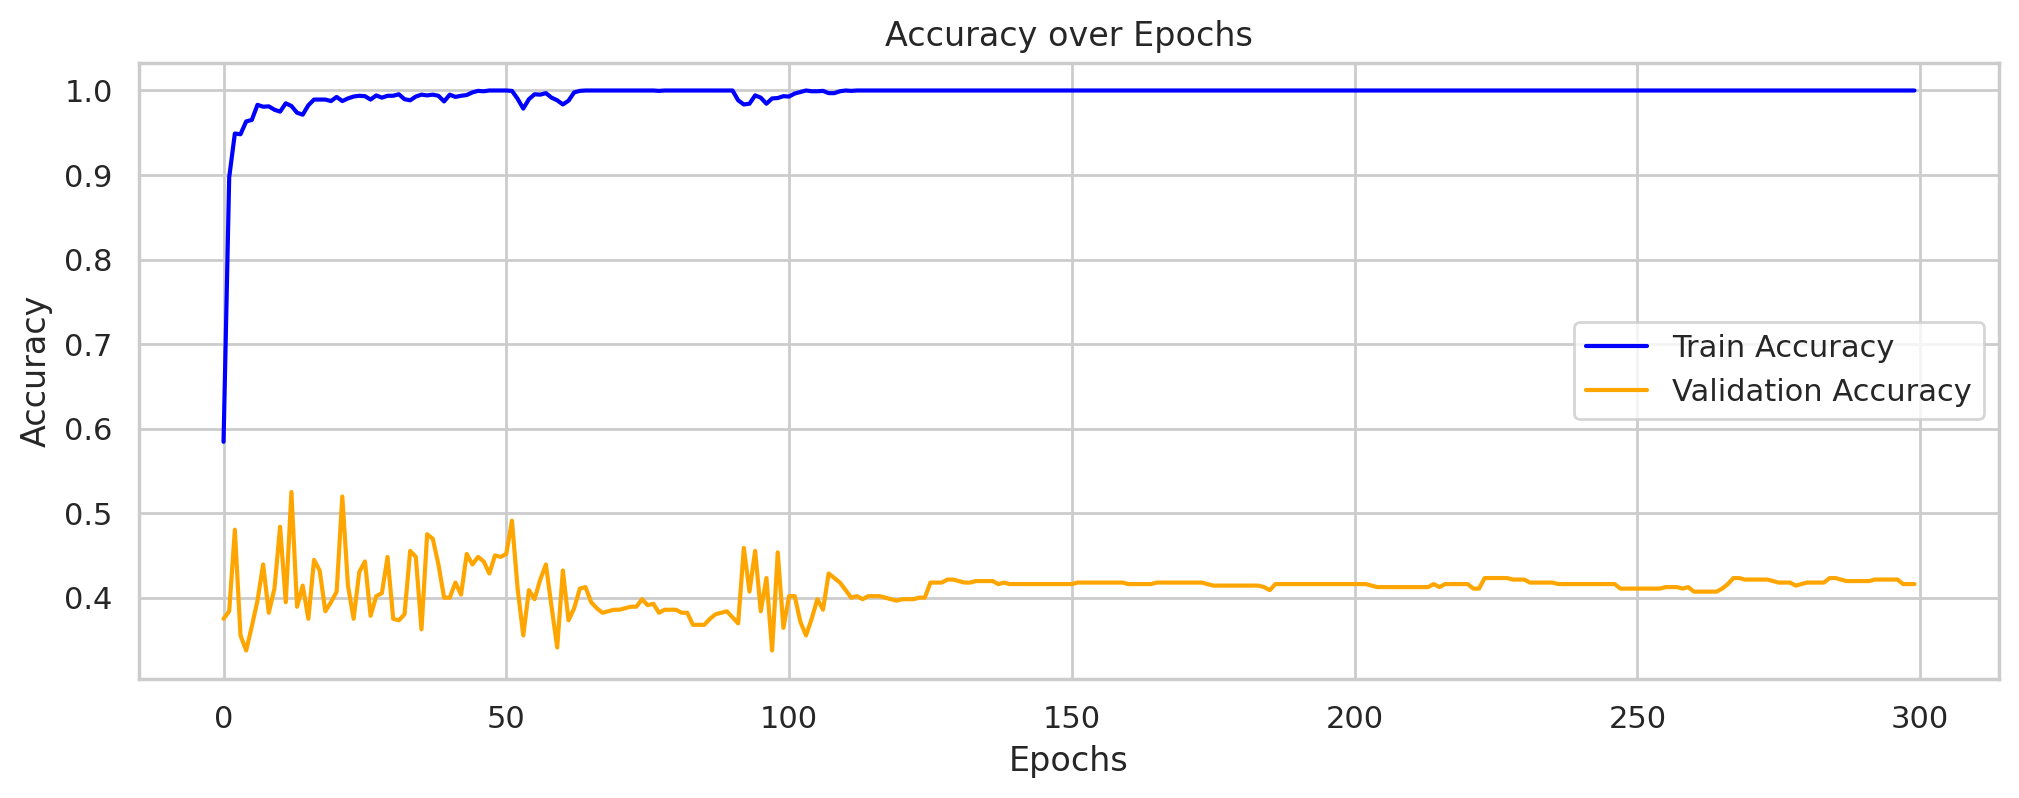

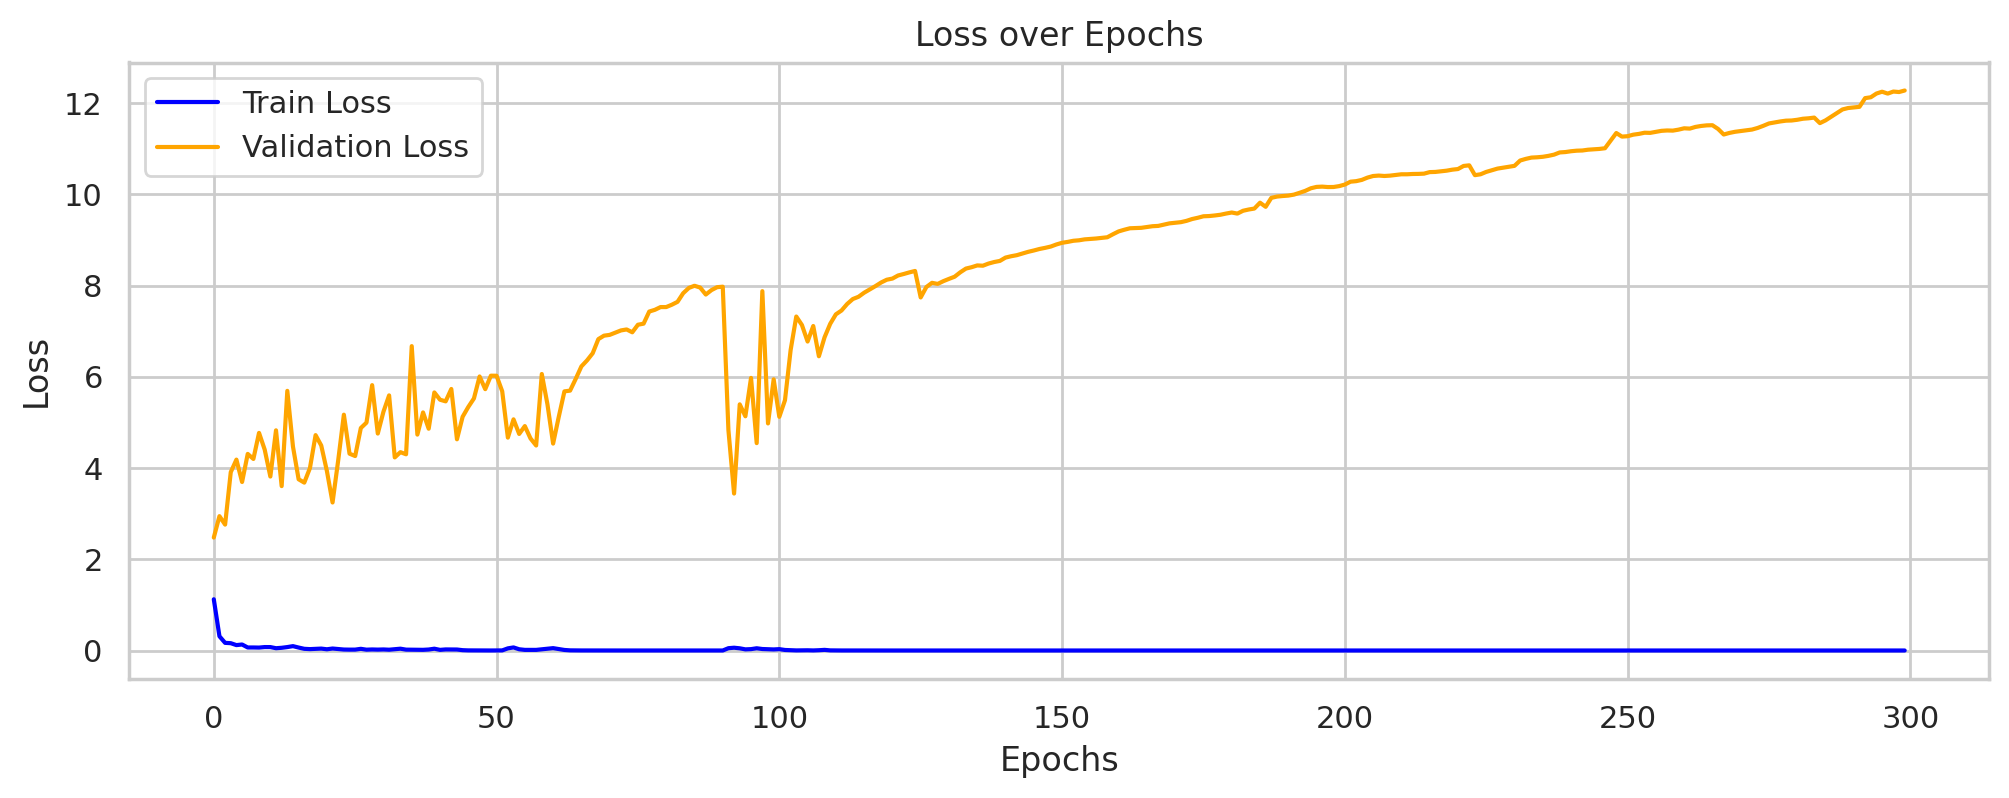

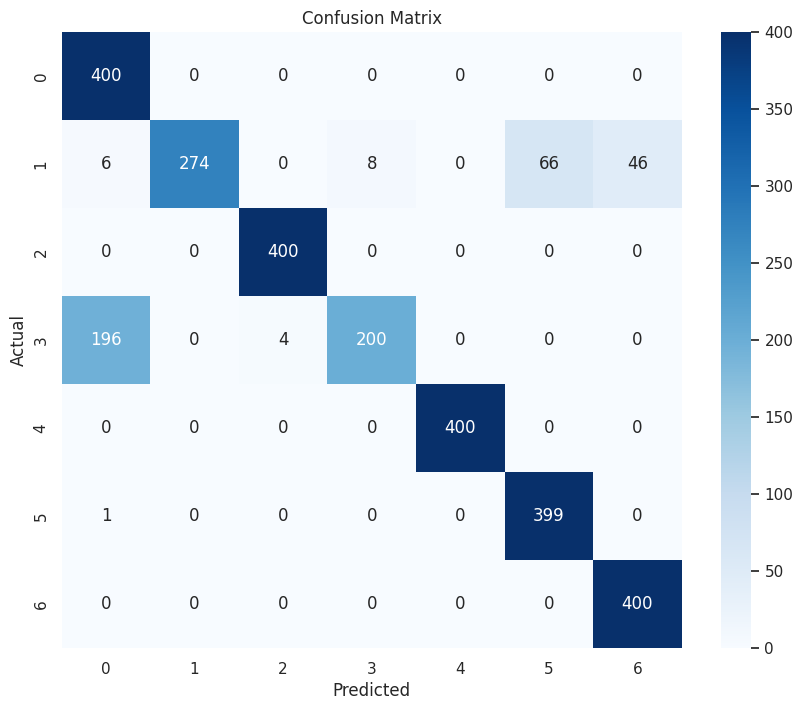

              precision    recall  f1-score   support

     Neutral  0.66334992 1.00000000 0.79760718       400
       Happy  1.00000000 0.68500000 0.81305638       400
         Sad  0.99009901 1.00000000 0.99502488       400
       Angry  0.96153846 0.50000000 0.65789474       400
        Fear  1.00000000 1.00000000 1.00000000       400
     Disgust  0.85806452 0.99750000 0.92254335       400
    Surprise  0.89686099 1.00000000 0.94562648       400

    accuracy                      0.88321429      2800
   macro avg  0.90998756 0.88321429 0.87596471      2800
weighted avg  0.90998756 0.88321429 0.87596471      2800



In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import numpy as np

# Update target names based on the TESS dataset's emotion classes
target_names = ['Neutral', 'Happy', 'Sad', 'Angry', 'Fear', 'Disgust', 'Surprise']  # Adjust as per TESS dataset

# Initialize the LSTM model
model = Sequential([
    LSTM(256, return_sequences=False, input_shape=(40, 1)),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(len(target_names), activation='softmax')  # Adjust output layer for TESS's number of emotions
])

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Display the model summary
model.summary()

# Train the model
history = model.fit(
    X, y,  # Ensure `X` and `y` are the processed TESS dataset
    validation_split=0.2,
    batch_size=64,
    epochs=300
)

# Function to plot history
def plot_history(history):
    plt.figure(figsize=(12, 4), dpi=200)
    plt.plot(history.history['accuracy'], label='Train Accuracy', color='blue')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='orange')
    plt.title('Accuracy over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.figure(figsize=(12, 4), dpi=200)
    plt.plot(history.history['loss'], label='Train Loss', color='blue')
    plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
    plt.title('Loss over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

# Plot training history
plot_history(history)

# Evaluate the model
evaluation = model.evaluate(X, y, verbose=0)
print(f"Loss: {evaluation[0]:.8f}, Accuracy: {evaluation[1]:.8f}")

# Confusion Matrix and Classification Report
y_pred = model.predict(X, verbose=0)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y, axis=1)

cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

# Classification report
report = classification_report(y_true, y_pred_classes, target_names=target_names, digits=8)
print(report)
model.save("lstm_emotion_model.h5")

## BiLSTM Model

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ bidirectional (Bidirectional)        │ (None, 512)                 │         528,384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 128)                 │          65,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 7)                   │             455 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 602,759 (2.30 MB)

 Trainable params: 602,759 (2.30 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/300
35/35 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - accuracy: 0.4195 - loss: 1.5589 - val_accuracy: 0.3929 - val_loss: 2.2917
Epoch 2/300
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.8702 - loss: 0.3721 - val_accuracy: 0.4464 - val_loss: 2.1155
Epoch 3/300
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9531 - loss: 0.1652 - val_accuracy: 0.4875 - val_loss: 3.0862
Epoch 4/300
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9708 - loss: 0.0800 - val_accuracy: 0.4625 - val_loss: 3.8096
Epoch 5/300
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9798 - loss: 0.0839 - val_accuracy: 0.4696 - val_loss: 2.7145
Epoch 6/300
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9745 - loss: 0.0818 - val_accuracy: 0.4018 - val_loss: 3.9401
Epoch 7/300
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9753 - loss: 0.0662 - val_accuracy: 0.4107 - val_loss: 4.8702
Epoch 8/300
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9885 - loss: 0.0340 - val_accuracy: 0.

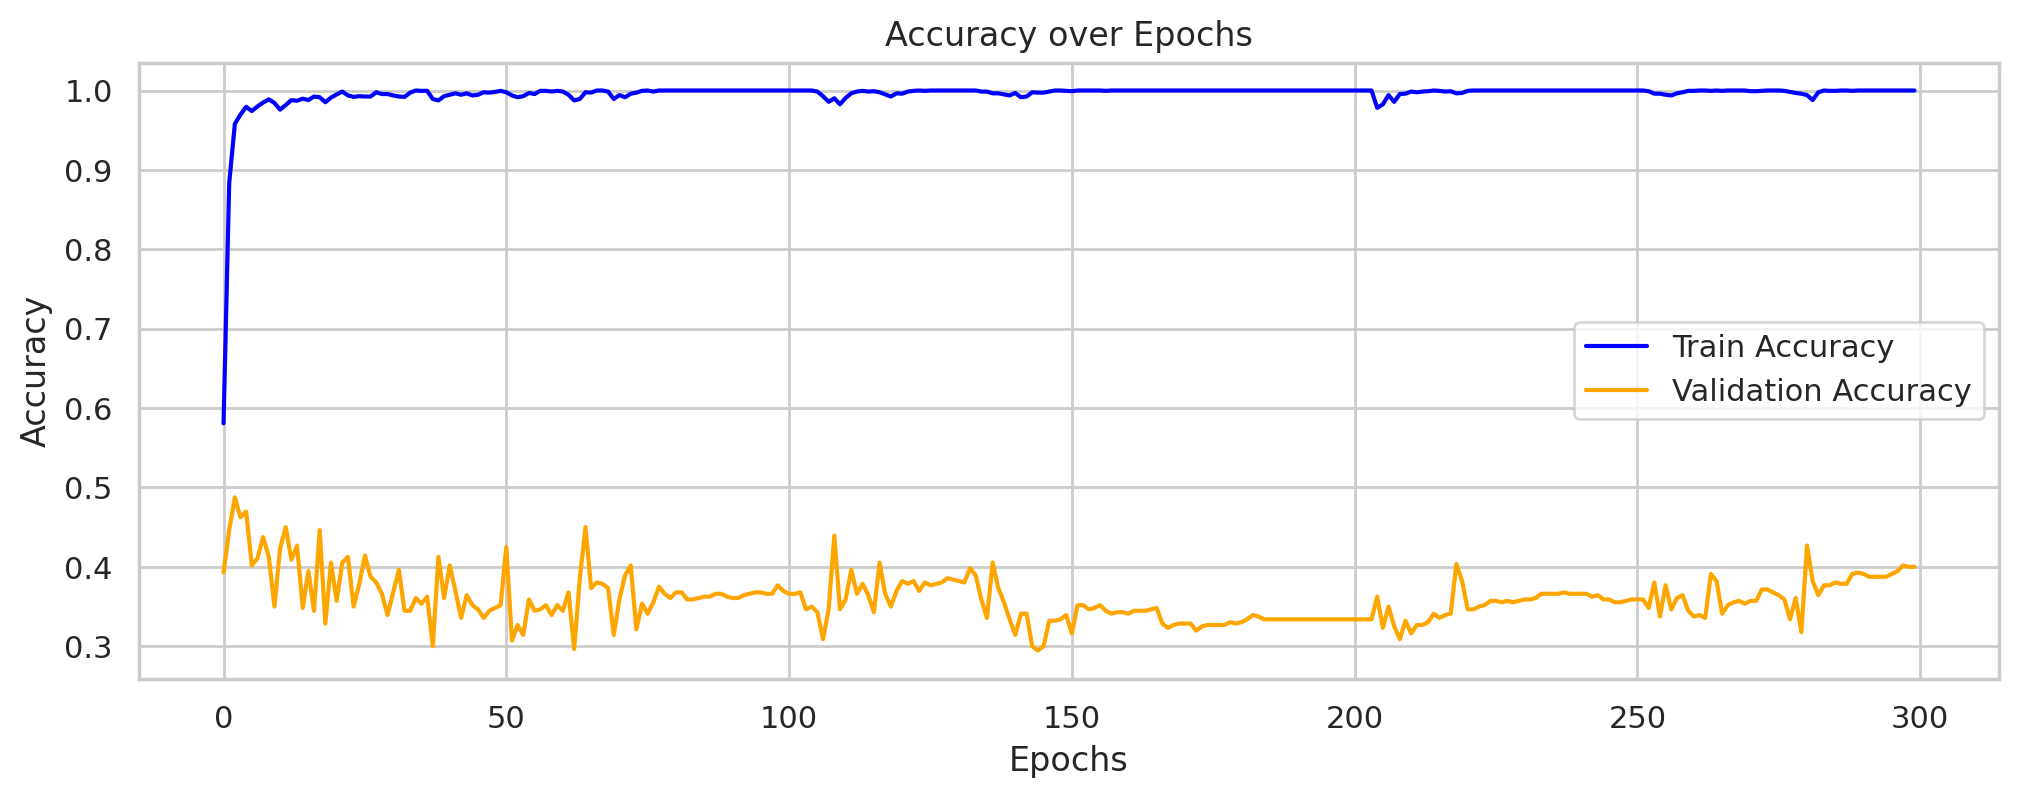

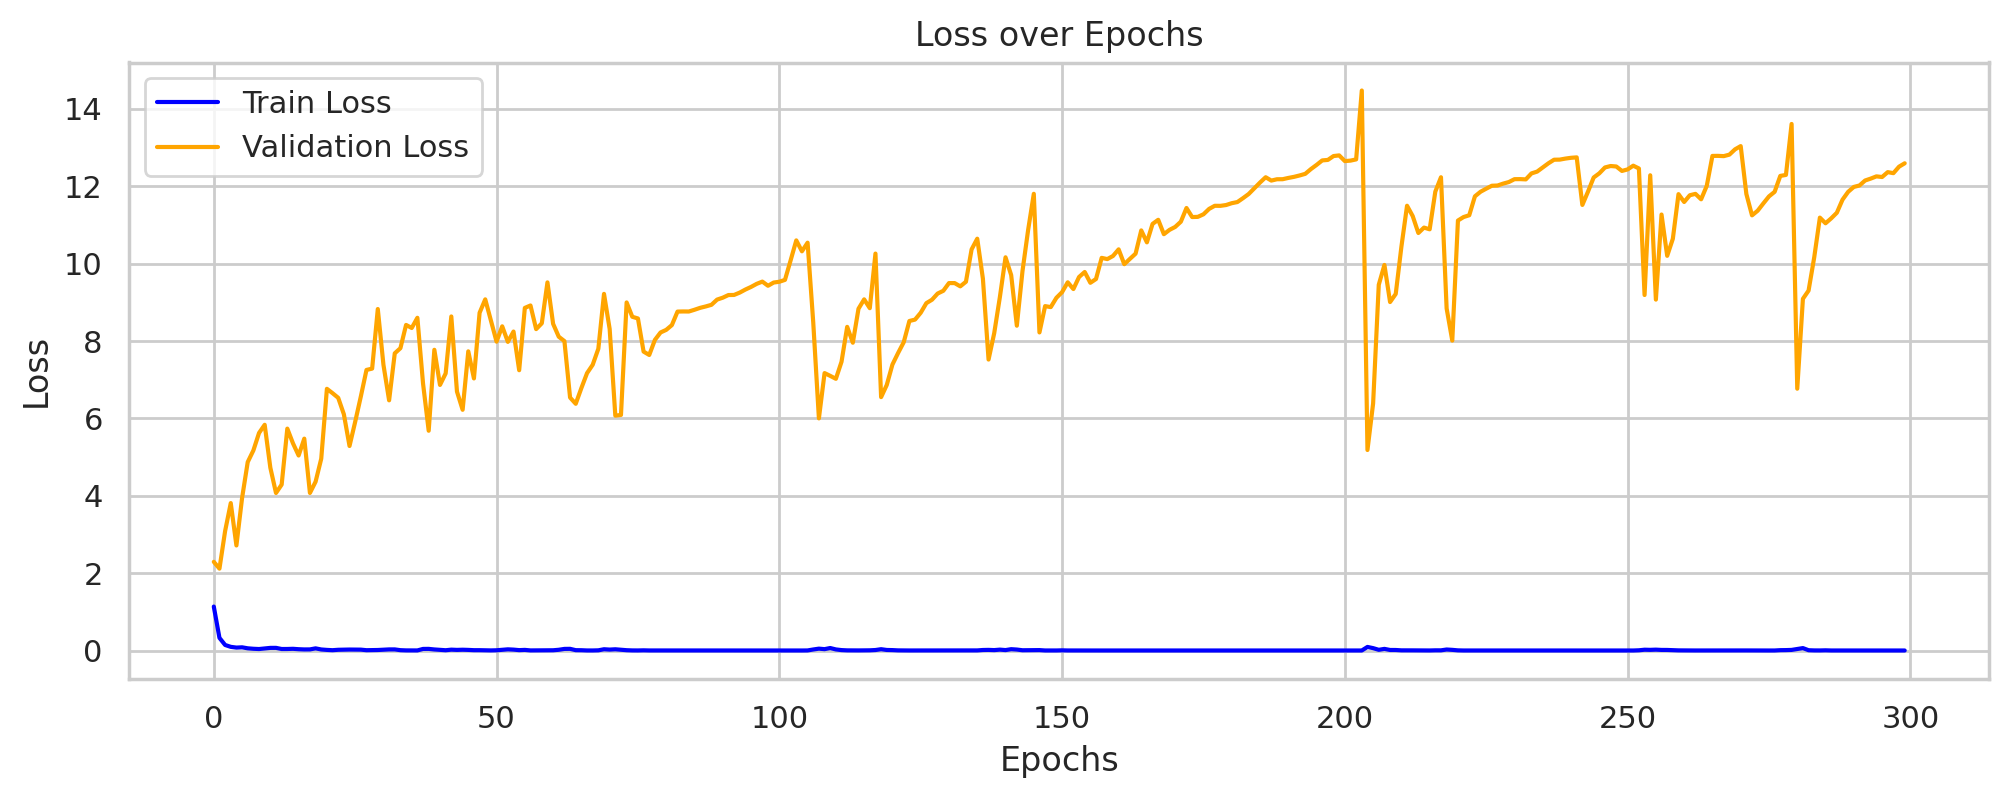

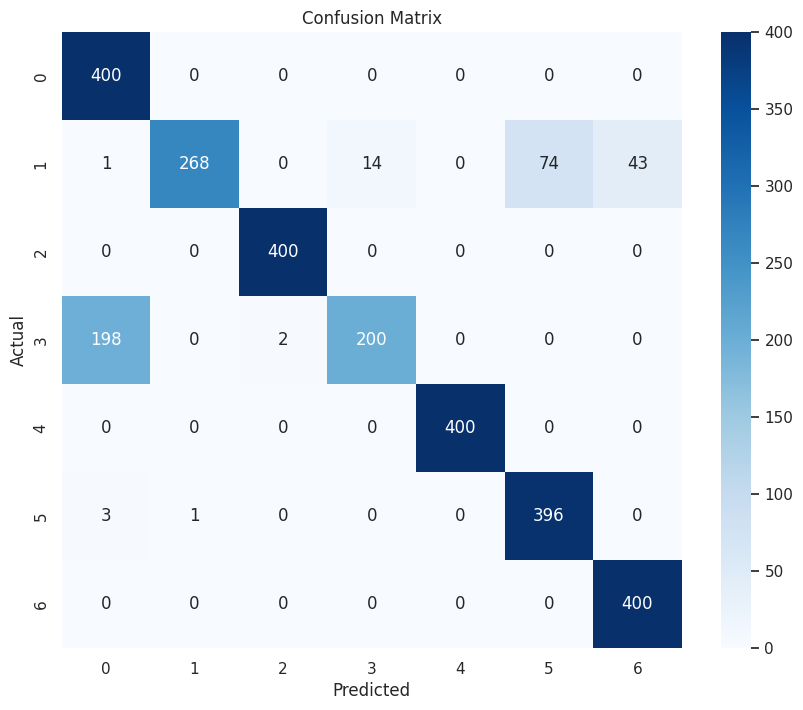

              precision    recall  f1-score   support

     Neutral  0.66445183 1.00000000 0.79840319       400
       Happy  0.99628253 0.67000000 0.80119581       400
         Sad  0.99502488 1.00000000 0.99750623       400
       Angry  0.93457944 0.50000000 0.65146580       400
        Fear  1.00000000 1.00000000 1.00000000       400
     Disgust  0.84255319 0.99000000 0.91034483       400
    Surprise  0.90293454 1.00000000 0.94899170       400

    accuracy                      0.88000000      2800
   macro avg  0.90511806 0.88000000 0.87255822      2800
weighted avg  0.90511806 0.88000000 0.87255822      2800



In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Bidirectional, LSTM, Dense, Dropout
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import numpy as np

# Update target names based on the TESS dataset's emotion classes
target_names = ['Neutral', 'Happy', 'Sad', 'Angry', 'Fear', 'Disgust', 'Surprise']

# Initialize the BiLSTM model
model = Sequential([
    Bidirectional(LSTM(256, return_sequences=False), input_shape=(40, 1)),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(len(target_names), activation='softmax')  # Adjust output layer for TESS's number of emotions
])

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Display the model summary
model.summary()

# Train the model
history = model.fit(
    X, y,
    validation_split=0.2,
    batch_size=64,
    epochs=300
)

# Plot training history
plot_history(history)

# Evaluate the model
evaluation = model.evaluate(X, y, verbose=0)
print(f"Loss: {evaluation[0]:.8f}, Accuracy: {evaluation[1]:.8f}")

# Confusion Matrix and Classification Report
y_pred = model.predict(X, verbose=0)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y, axis=1)

cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

report = classification_report(y_true, y_pred_classes, target_names=target_names, digits=8)
print(report)

## GRU Model

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ gru (GRU)                            │ (None, 256)                 │         198,912 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 7)                   │             455 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 240,519 (939.53 KB)

 Trainable params: 240,519 (939.53 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/300
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.3488 - loss: 1.6879 - val_accuracy: 0.0982 - val_loss: 5.4947
Epoch 2/300
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7250 - loss: 0.6950 - val_accuracy: 0.2946 - val_loss: 5.5004
Epoch 3/300
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8449 - loss: 0.4091 - val_accuracy: 0.3589 - val_loss: 5.3070
Epoch 4/300
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9187 - loss: 0.2492 - val_accuracy: 0.3625 - val_loss: 5.3105
Epoch 5/300
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9486 - loss: 0.1622 - val_accuracy: 0.3857 - val_loss: 4.9998
Epoch 6/300
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9599 - loss: 0.1008 - val_accuracy: 0.4268 - val_loss: 4.6513
Epoch 7/300
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9620 - loss: 0.1102 - val_accuracy: 0.3679 - val_loss: 5.0741
Epoch 8/300
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9669 - loss: 0.1042 - val_accuracy: 0.3339 -

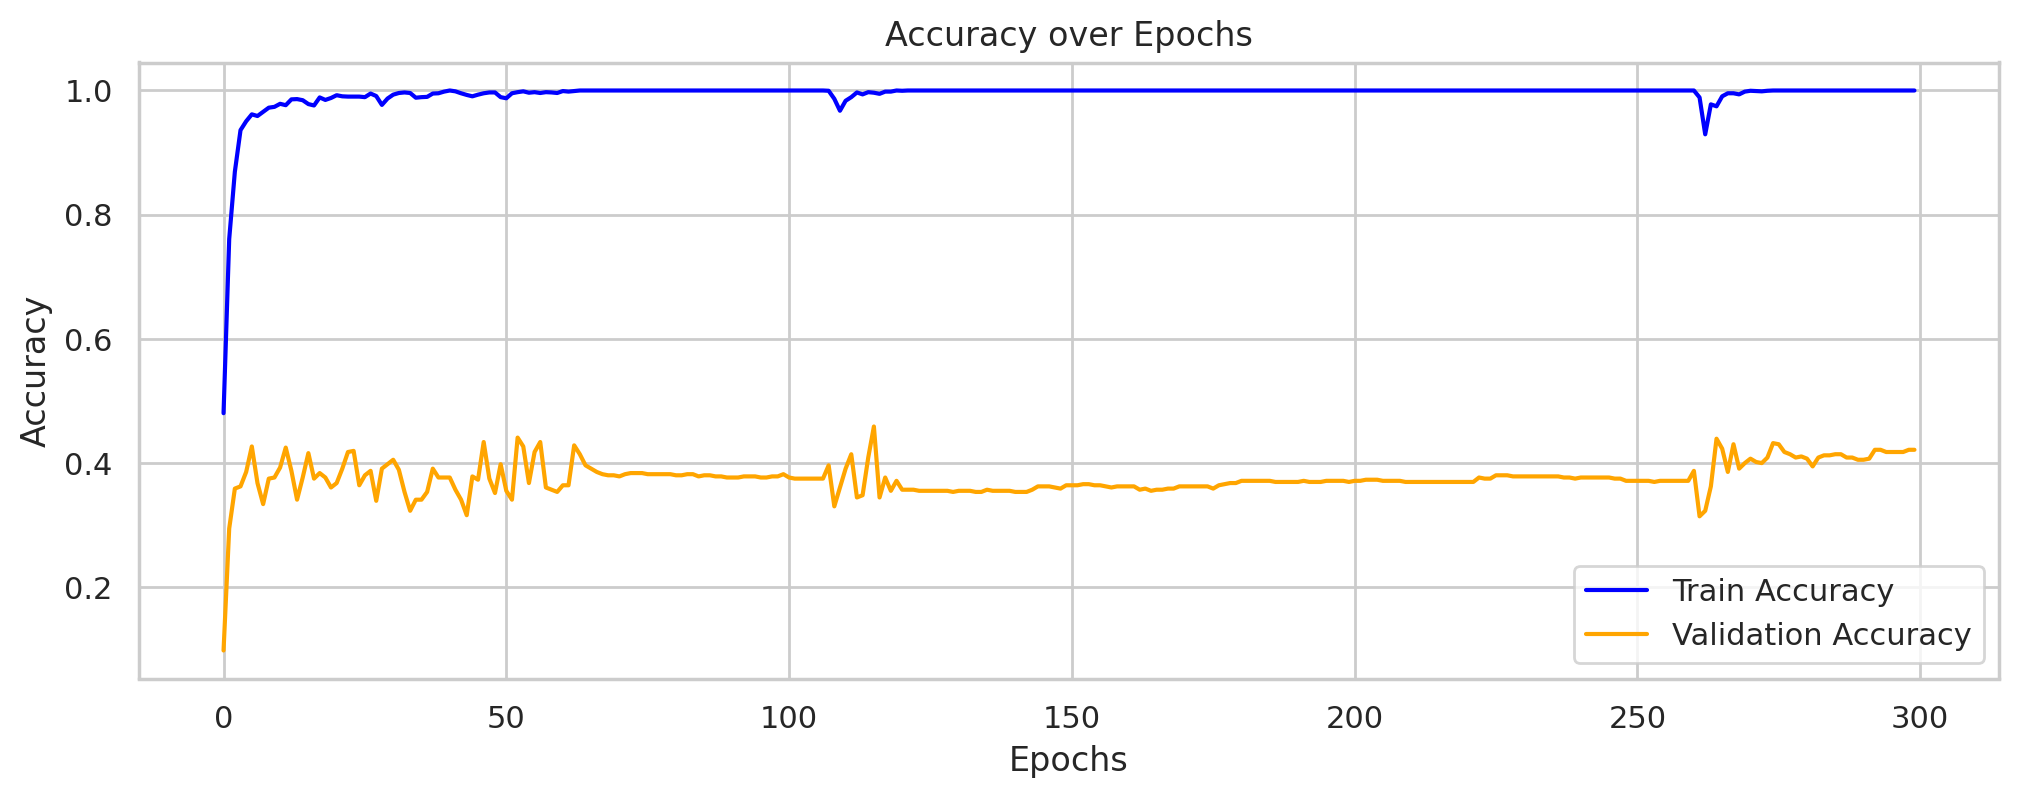

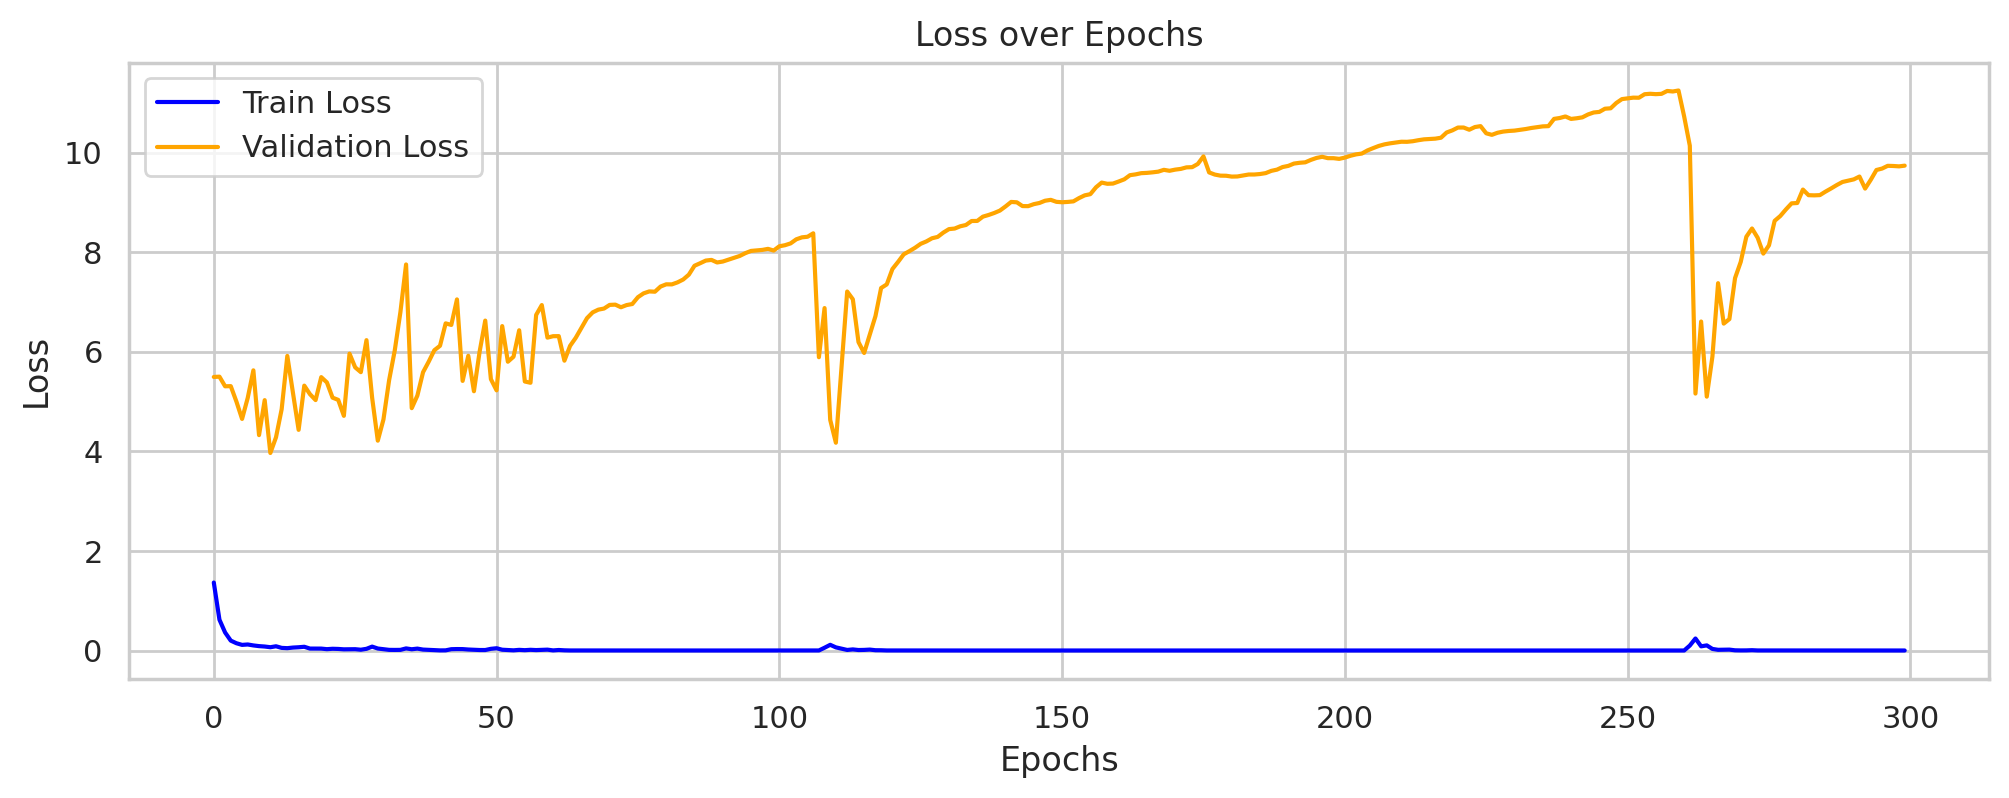

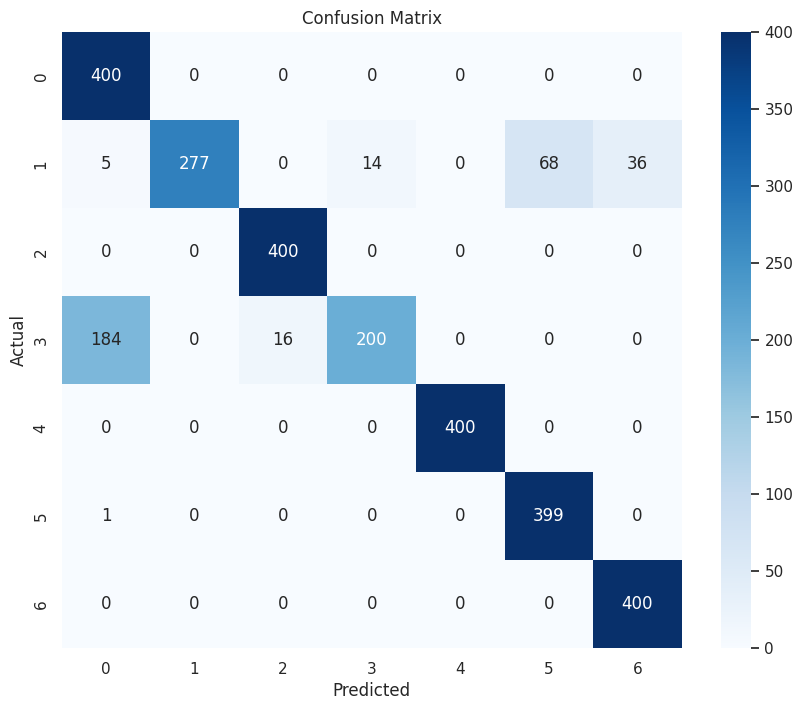

              precision    recall  f1-score   support

     Neutral  0.67796610 1.00000000 0.80808081       400
       Happy  1.00000000 0.69250000 0.81831610       400
         Sad  0.96153846 1.00000000 0.98039216       400
       Angry  0.93457944 0.50000000 0.65146580       400
        Fear  1.00000000 1.00000000 1.00000000       400
     Disgust  0.85438972 0.99750000 0.92041522       400
    Surprise  0.91743119 1.00000000 0.95693780       400

    accuracy                      0.88428571      2800
   macro avg  0.90655785 0.88428571 0.87651541      2800
weighted avg  0.90655785 0.88428571 0.87651541      2800



In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import numpy as np

# Update target names based on the TESS dataset's emotion classes
target_names = ['Neutral', 'Happy', 'Sad', 'Angry', 'Fear', 'Disgust', 'Surprise']

# Initialize the GRU model
model = Sequential([
    GRU(256, return_sequences=False, input_shape=(40, 1)),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(len(target_names), activation='softmax')  # Adjust output layer for TESS's number of emotions
])

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Display the model summary
model.summary()

# Train the model
history = model.fit(
    X, y,
    validation_split=0.2,
    batch_size=64,
    epochs=300
)

# Plot training history
plot_history(history)

# Evaluate the model
evaluation = model.evaluate(X, y, verbose=0)
print(f"Loss: {evaluation[0]:.8f}, Accuracy: {evaluation[1]:.8f}")

# Confusion Matrix and Classification Report
y_pred = model.predict(X, verbose=0)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y, axis=1)

cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

report = classification_report(y_true, y_pred_classes, target_names=target_names, digits=8)
print(report)

## BiGRU Model

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ bidirectional_1 (Bidirectional)      │ (None, 512)                 │         397,824 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 128)                 │          65,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 7)                   │             455 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 472,199 (1.80 MB)

 Trainable params: 472,199 (1.80 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/300
35/35 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - accuracy: 0.3522 - loss: 1.6626 - val_accuracy: 0.2929 - val_loss: 2.7947
Epoch 2/300
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.7720 - loss: 0.5972 - val_accuracy: 0.3375 - val_loss: 4.7735
Epoch 3/300
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9141 - loss: 0.2698 - val_accuracy: 0.3696 - val_loss: 4.6566
Epoch 4/300
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9516 - loss: 0.1608 - val_accuracy: 0.3393 - val_loss: 6.1716
Epoch 5/300
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9562 - loss: 0.1273 - val_accuracy: 0.3161 - val_loss: 6.1513
Epoch 6/300
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9714 - loss: 0.0912 - val_accuracy: 0.3911 - val_loss: 5.8547
Epoch 7/300
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9796 - loss: 0.0745 - val_accuracy: 0.3482 - val_loss: 6.5364
Epoch 8/300
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9817 - loss: 0.0723 - val_accuracy: 0.

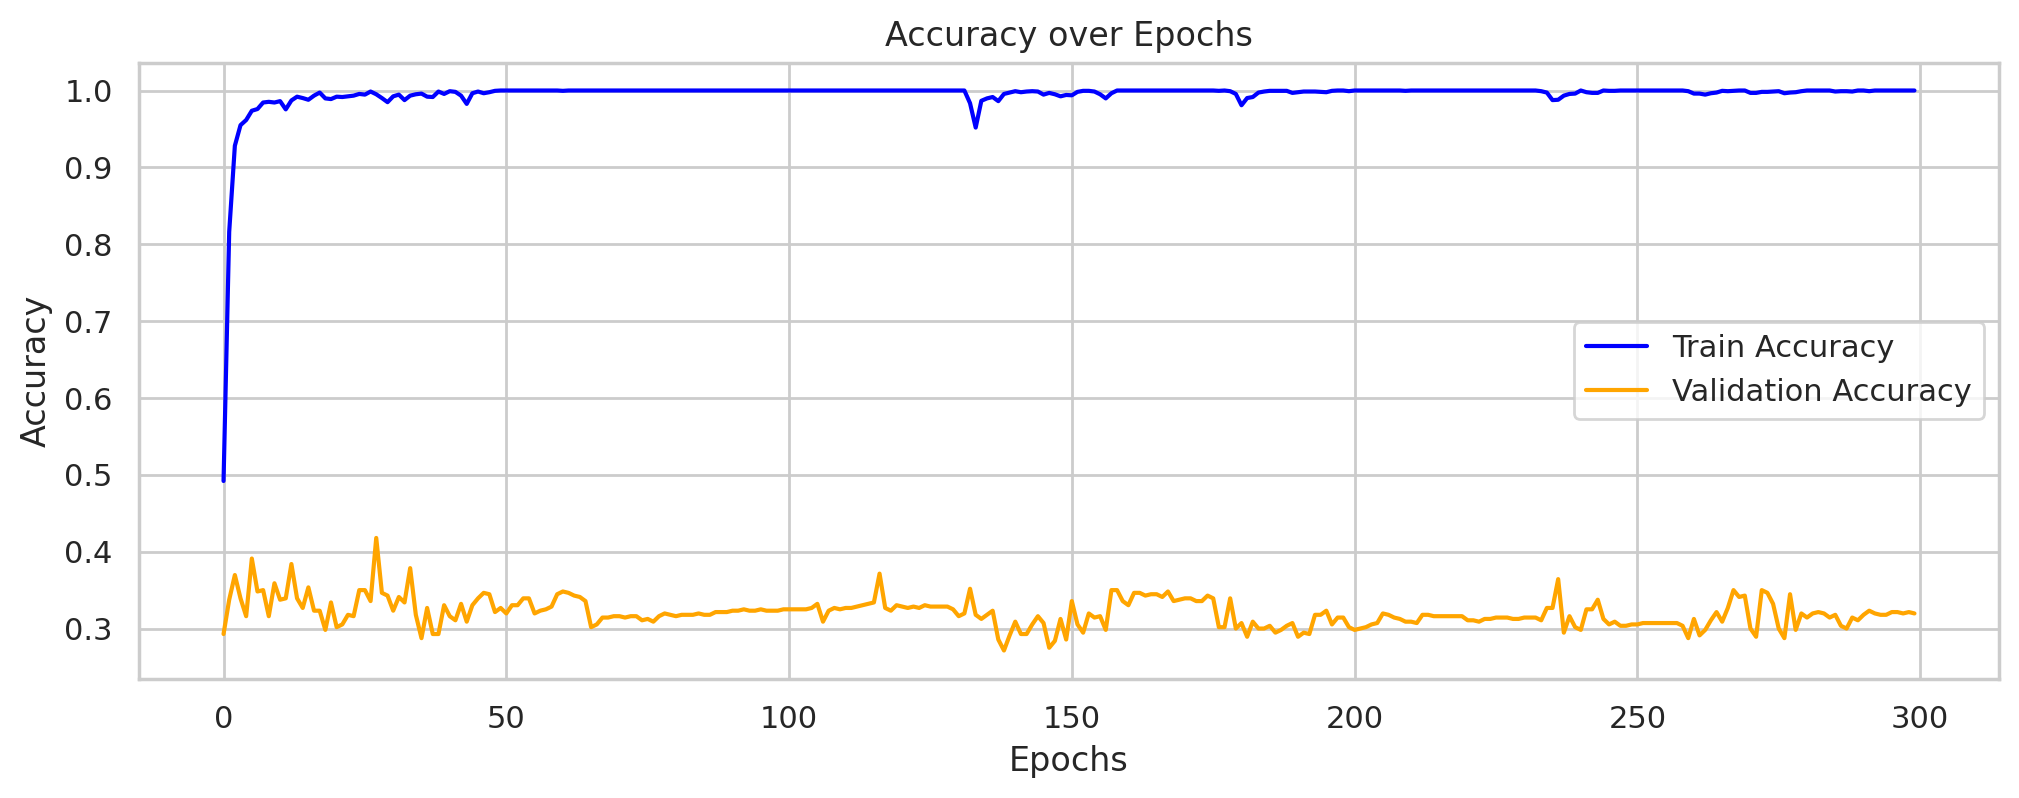

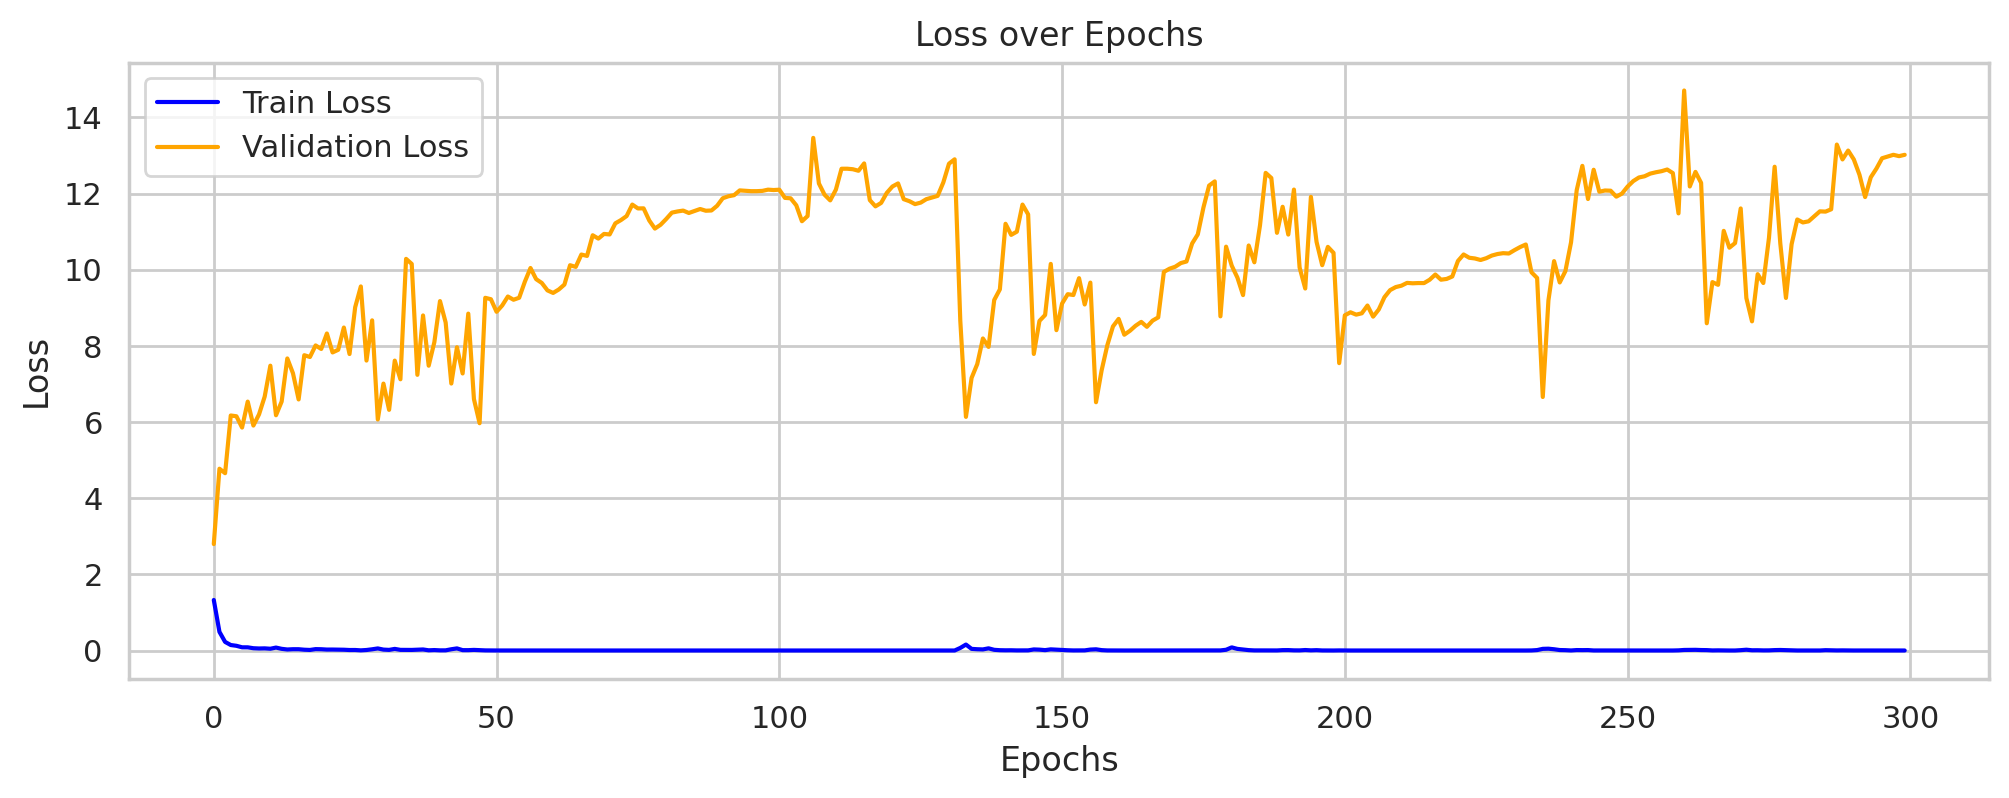

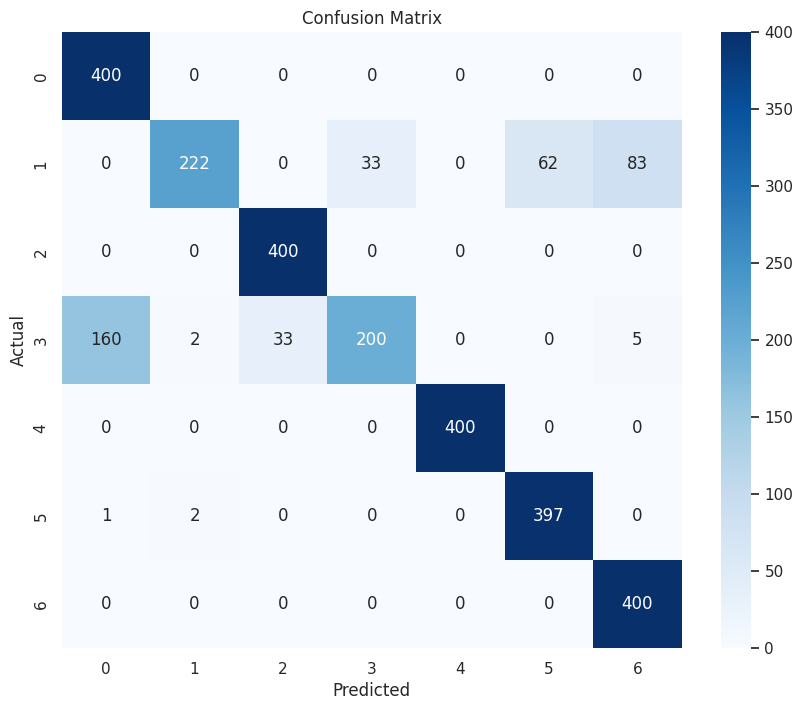

              precision    recall  f1-score   support

     Neutral  0.71301248 1.00000000 0.83246618       400
       Happy  0.98230088 0.55500000 0.70926518       400
         Sad  0.92378753 1.00000000 0.96038415       400
       Angry  0.85836910 0.50000000 0.63191153       400
        Fear  1.00000000 1.00000000 1.00000000       400
     Disgust  0.86492375 0.99250000 0.92433062       400
    Surprise  0.81967213 1.00000000 0.90090090       400

    accuracy                      0.86392857      2800
   macro avg  0.88029512 0.86392857 0.85132265      2800
weighted avg  0.88029512 0.86392857 0.85132265      2800



In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Bidirectional, GRU, Dense, Dropout
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import numpy as np

# Update target names based on the TESS dataset's emotion classes
target_names = ['Neutral', 'Happy', 'Sad', 'Angry', 'Fear', 'Disgust', 'Surprise']

# Initialize the BiGRU model
model = Sequential([
    Bidirectional(GRU(256, return_sequences=False), input_shape=(40, 1)),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(len(target_names), activation='softmax')  # Adjust output layer for TESS's number of emotions
])

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Display the model summary
model.summary()

# Train the model
history = model.fit(
    X, y,
    validation_split=0.2,
    batch_size=64,
    epochs=300
)

# Plot training history
plot_history(history)

# Evaluate the model
evaluation = model.evaluate(X, y, verbose=0)
print(f"Loss: {evaluation[0]:.8f}, Accuracy: {evaluation[1]:.8f}")

# Confusion Matrix and Classification Report
y_pred = model.predict(X, verbose=0)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y, axis=1)

cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

report = classification_report(y_true, y_pred_classes, target_names=target_names, digits=8)
print(report)

In [ ]:
# Save the trained model
model.save("lstm_emotion_model.h5")

In [ ]:
from tensorflow.keras.models import load_model

# Load the saved LSTM model
model = load_model("lstm_emotion_model.h5")

In [ ]:
import librosa
import numpy as np

def extract_features(file_path, max_pad_len=174):
    """
    Extract MFCC features from an audio file.
    """
    audio, sample_rate = librosa.load(file_path, sr=22050)  # Load audio file
    mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)  # Extract 40 MFCC features

    # Padding or truncating to ensure consistent input size
    pad_width = max_pad_len - mfccs.shape[1]
    if pad_width > 0:
        mfccs = np.pad(mfccs, pad_width=((0, 0), (0, pad_width)), mode='constant')
    else:
        mfccs = mfccs[:, :max_pad_len]

    return mfccs

# Example: Extract features from an audio file
file_path = "/root/.cache/kagglehub/datasets/dmitrybabko/speech-emotion-recognition-en/versions/1/Tess/OAF_happy/OAF_bar_happy.wav"  # Replace with the actual audio file
features = extract_features(file_path)
features = np.expand_dims(features, axis=0)  # Reshape for model input


In [ ]:

# # Make prediction
# predicted_class = model.predict(features)
# predicted_label = np.argmax(predicted_class)  # Get the class index

# print("Predicted Class Probabilities:", predicted_class)
# print("Predicted Label Index:", predicted_label)

# # Map class index to emotion labels
# emotion_labels = {
#     0: "Happy",
#     1: "Sad",
#     2: "Angry",
#     3: "Neutral",
#     4: "Fear",
#     5: "Surprise",
#     6: "Disgust"
# }  # Update based on your dataset
# predicted_emotion = emotion_labels.get(predicted_label, "Unknown Emotion")
# print("Model Output Shape:", predicted_class.shape)


# predicted_emotion = emotion_labels[predicted_label]

# print(f"Predicted Emotion: {predicted_emotion}")

# Make prediction
predicted_class = model.predict(features)
predicted_label = np.argmax(predicted_class)  # Get the class index

print("Predicted Class Probabilities:", predicted_class)
print("Predicted Label Index:", predicted_label)

# Define the emotion labels based on your dataset
emotion_labels = {
    0: "Happy",
    1: "Sad",
    2: "Angry",
    3: "Neutral",
    4: "Fear",
    5: "Surprise",
    6: "Disgust"
}

# Simulate the true emotion label (Replace this with actual label from dataset)
true_label = 1  # Example: Assume the actual label is 1 (Sad)
true_emotion = emotion_labels.get(true_label, "Unknown Emotion")

# Get the predicted emotion safely
predicted_emotion = emotion_labels.get(predicted_label, "Unknown Emotion")

# Print both the true and predicted emotion
print(f"True Emotion: {true_emotion} | Predicted Emotion: {predicted_emotion}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step
Predicted Class Probabilities: [[0.5194078  0.34440932 0.02259714 0.00474155 0.0409809  0.00647111
  0.06139218]]
Predicted Label Index: 0
True Emotion: Sad | Predicted Emotion: Happy


In [ ]:
# import librosa
# import numpy as np
# import tensorflow as tf
# import librosa.display
# import matplotlib.pyplot as plt

# # Load your trained LSTM model
# MODEL_PATH = "lstm_emotion_model.h5"  # Change this to your actual model path
# model = tf.keras.models.load_model(MODEL_PATH)

# # Define emotions based on your training dataset labels
# emotion_labels = ['Neutral', 'Happy', 'Sad', 'Angry', 'Fear', 'Disgust', 'Surprise']

# def extract_features(audio_path, max_pad_len=174):
#     """
#     Extracts MFCC features from an audio file and reshapes for LSTM model.
#     """
#     y, sr = librosa.load(audio_path, sr=22050)  # Load audio
#     mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40)  # Extract 40 MFCCs

#     # Pad/truncate MFCCs to match LSTM input shape
#     if mfccs.shape[1] < max_pad_len:
#         pad_width = max_pad_len - mfccs.shape[1]
#         mfccs = np.pad(mfccs, pad_width=((0, 0), (0, pad_width)), mode='constant')
#     else:
#         mfccs = mfccs[:, :max_pad_len]

#     return mfccs.T  # Transpose to match LSTM input shape (time_steps, features)

# def predict_emotion(audio_path):
#     """
#     Predicts the emotion of the given audio file using the trained LSTM model.
#     """
#     features = extract_features(audio_path)
#     features = np.expand_dims(features, axis=0)  # Reshape for model (batch_size, time_steps, features)

#     prediction = model.predict(features)
#     predicted_emotion = emotion_labels[np.argmax(prediction)]  # Get the highest probability emotion

#     print(f"🎙️ Predicted Emotion: {predicted_emotion}")

# # 🔹 Example Usage: Provide your audio file path
# AUDIO_PATH = "/kaggle/input/speech-emotion-recognition-en/Tess/OAF_Sad/OAF_back_sad.wav"  # Replace with your actual .wav file path
# predict_emotion(AUDIO_PATH)
import librosa
import numpy as np
import tensorflow as tf
import librosa.display
import matplotlib.pyplot as plt
import os

# Load your trained LSTM model
MODEL_PATH = "lstm_emotion_model.h5"  # Change this to your actual model path
model = tf.keras.models.load_model(MODEL_PATH)

# Define emotions based on your training dataset labels
emotion_labels = ['Neutral', 'Happy', 'Sad', 'Angry', 'Fear', 'Disgust', 'Surprise']

def extract_features(audio_path, max_pad_len=174):
    """
    Extracts MFCC features from an audio file and reshapes for LSTM model.
    """
    y, sr = librosa.load(audio_path, sr=22050)  # Load audio
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40)  # Extract 40 MFCCs

    # Pad/truncate MFCCs to match LSTM input shape
    if mfccs.shape[1] < max_pad_len:
        pad_width = max_pad_len - mfccs.shape[1]
        mfccs = np.pad(mfccs, pad_width=((0, 0), (0, pad_width)), mode='constant')
    else:
        mfccs = mfccs[:, :max_pad_len]

    return mfccs.T  # Transpose to match LSTM input shape (time_steps, features)

def extract_true_emotion(audio_path):
    """
    Extracts the true emotion from the filename (assuming dataset follows a structured naming convention).
    Example: 'OAF_back_sad.wav' -> 'Sad'
    """
    filename = os.path.basename(audio_path)  # Extract only the filename
    for emotion in emotion_labels:
        if emotion.lower() in filename.lower():
            return emotion  # Return the matched emotion
    return "Unknown"  # If no emotion is found in filename

def predict_emotion(audio_path):
    """
    Predicts the emotion of the given audio file using the trained LSTM model.
    """
    features = extract_features(audio_path)
    features = np.expand_dims(features, axis=0)  # Reshape for model (batch_size, time_steps, features)

    prediction = model.predict(features)
    predicted_emotion = emotion_labels[np.argmax(prediction)]  # Get the highest probability emotion

    # Get the true emotion from filename
    true_emotion = extract_true_emotion(audio_path)

    print(f"🎙️ True Emotion: {true_emotion} | 🧠 Predicted Emotion: {predicted_emotion}")

# 🔹 Example Usage: Provide your audio file path
AUDIO_PATH = "/root/.cache/kagglehub/datasets/dmitrybabko/speech-emotion-recognition-en/versions/1/Tess/OAF_Sad/OAF_back_sad.wav"  # Replace with actual file path
predict_emotion(AUDIO_PATH)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step
🎙️ True Emotion: Sad | 🧠 Predicted Emotion: Disgust


In [ ]:
# import librosa
# import numpy as np

# def extract_features(audio_file):
#     y, sr = librosa.load(audio_file, sr=22050)

#     # Extract features
#     mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40)
#     chroma = librosa.feature.chroma_stft(y=y, sr=sr)
#     contrast = librosa.feature.spectral_contrast(y=y, sr=sr)
#     tonnetz = librosa.feature.tonnetz(y=librosa.effects.harmonic(y), sr=sr)

#     # Compute mean of each feature
#     features = np.concatenate((
#         np.mean(mfccs, axis=1),
#         np.mean(chroma, axis=1),
#         np.mean(contrast, axis=1),
#         np.mean(tonnetz, axis=1)
#     ))

#     return np.expand_dims(features, axis=0)  # Reshape for model input


In [ ]:
# import tensorflow as tf
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, LSTM, Dense, Dropout

# def build_model(input_shape):
#     model = Sequential([
#         Conv1D(64, kernel_size=5, activation='relu', input_shape=input_shape),
#         MaxPooling1D(pool_size=2),
#         LSTM(64, return_sequences=True),
#         LSTM(64),
#         Dense(64, activation='relu'),
#         Dropout(0.3),
#         Dense(6, activation='softmax')  # 6 emotion categories
#     ])

#     model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
#     return model

# # Example Usage
# input_shape = (173, 1)  # Adjust based on dataset
# model = build_model(input_shape)
# model.summary()


In [ ]:
# !pip install librosa numpy tensorflow sounddevice scipy

In [ ]:
# !pip install sounddevice

In [ ]:
# from pydub import AudioSegment
# from pydub.playback import play
# import wave

# def record_audio_pydub(filename="audio.wav", duration=5):
#     print("Recording... Speak now!")
#     recording = AudioSegment.silent(duration=duration * 1000)
#     play(recording)

#     # Save the recording
#     recording.export(filename, format="wav")
#     print("Recording complete! Saved as", filename)

# record_audio_pydub()


In [ ]:
# import librosa
# import numpy as np
# import tensorflow as tf
# import librosa.display

# # Load the trained LSTM model (Replace 'lstm_model.h5' with your actual model file)
# MODEL_PATH = "/content/lstm_emotion_model.h5"
# model = tf.keras.models.load_model(MODEL_PATH)

# # Define the classes (Make sure these match your dataset labels)
# EMOTIONS = ["Neutral", "Happy", "Sad", "Angry", "Fear", "Disgust", "Surprise"]

# def extract_features(file_path, max_pad_len=100):
#     """ Extract MFCC features from audio file """
#     audio, sample_rate = librosa.load(file_path, res_type='kaiser_fast')
#     mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)  # Extract 40 MFCCs

#     # Padding or truncating to max_pad_len
#     pad_width = max_pad_len - mfccs.shape[1]
#     if pad_width > 0:
#         mfccs = np.pad(mfccs, pad_width=((0, 0), (0, pad_width)), mode='constant')
#     else:
#         mfccs = mfccs[:, :max_pad_len]

#     return mfccs

# def predict_emotion(file_path):
#     """ Predict the emotion from the given audio file """
#     features = extract_features(file_path)
#     features = features[np.newaxis, ..., np.newaxis]  # Reshape for LSTM input

#     prediction = model.predict(features)
#     predicted_index = np.argmax(prediction)
#     predicted_emotion = EMOTIONS[predicted_index]

#     print(f"Predicted Emotion: {predicted_emotion}")

# # Predict emotion from the recorded audio file
# #file_path = "/content/speech-emotion-recognition-en1/Savee/DC_a01.wav"
# predict_emotion("/content/speech-emotion-recognition-en1/Tess/OAF_Sad/OAF_back_sad.wav")


In [ ]:
!pip install spotipy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 261.5/261.5 kB 9.4 MB/s eta 0:00:00


In [68]:
import librosa
import numpy as np
import tensorflow as tf
import os
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

# Load LSTM Model
MODEL_PATH = "/content/lstm_emotion_model.h5"  # Change this to your actual model path
model = tf.keras.models.load_model(MODEL_PATH)

# Define Emotions and Corresponding Music Genres
emotion_to_genre = {
    "Happy": "happy",
    "Sad": "sad",
    "Angry": "rock",
    "Neutral": "chill",
    "Fear": "ambient",
    "Disgust": "dark",
    "Surprise": "pop"
}

# # Spotify API Credentials (Get from Spotify Developer Dashboard)
# SPOTIPY_CLIENT_ID = "your_spotify_client_id"
# SPOTIPY_CLIENT_SECRET = "your_spotify_client_secret"
# Spotify API Credentials
SPOTIPY_CLIENT_ID = "31396ec8838d405cbf7900b3c6e3efc8"
SPOTIPY_CLIENT_SECRET = "0a156297de02484cbd0e5783d7a395c9"

# Authenticate with Spotify
sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(
    client_id=SPOTIPY_CLIENT_ID,
    client_secret=SPOTIPY_CLIENT_SECRET
))

def extract_features(audio_path, max_pad_len=174):
    """
    Extracts MFCC features from an audio file and reshapes for LSTM model.
    """
    y, sr = librosa.load(audio_path, sr=22050)  # Load audio
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40)  # Extract 40 MFCCs

    # Pad/truncate MFCCs to match LSTM input shape
    if mfccs.shape[1] < max_pad_len:
        pad_width = max_pad_len - mfccs.shape[1]
        mfccs = np.pad(mfccs, pad_width=((0, 0), (0, pad_width)), mode='constant')
    else:
        mfccs = mfccs[:, :max_pad_len]

    return mfccs.T  # Transpose to match LSTM input shape (time_steps, features)

def extract_true_emotion(audio_path):
    """
    Extracts the true emotion from the filename (assuming dataset follows a structured naming convention).
    Example: 'OAF_back_sad.wav' -> 'Sad'
    """
    emotion_labels = ["Neutral", "Happy", "Sad", "Angry", "Fear", "Disgust", "Surprise"]
    filename = os.path.basename(audio_path)
    for emotion in emotion_labels:
        if emotion.lower() in filename.lower():
            return emotion
    return "Unknown"

def predict_emotion(audio_path):
    """
    Predicts the emotion of the given audio file using the trained LSTM model.
    """
    emotion_labels = ["Neutral", "Happy", "Sad", "Angry", "Fear", "Disgust", "Surprise"]

    features = extract_features(audio_path)
    features = np.expand_dims(features, axis=0)  # Reshape for model (batch_size, time_steps, features)

    prediction = model.predict(features)
    predicted_emotion = emotion_labels[np.argmax(prediction)]  # Get the highest probability emotion
    true_emotion = extract_true_emotion(audio_path)

    print(f"🎙️ True Emotion: {true_emotion} | 🧠 Predicted Emotion: {predicted_emotion}")

    suggest_songs(predicted_emotion)

def suggest_songs(emotion):
    """
    Suggests songs based on the predicted emotion using Spotify.
    """
    genre = emotion_to_genre.get(emotion, "pop")  # Default to pop if unknown
    print(f"🎵 Fetching {genre}-based songs for mood: {emotion}...")

    # Search for tracks based on emotion genre
    results = sp.search(q=f"genre:{genre}", type="track", limit=5)

    if results and "tracks" in results:
        tracks = results["tracks"]["items"]
        print("\n🎶 Suggested Songs:\n")
        for track in tracks:
            print(f"🎵 {track['name']} - {track['artists'][0]['name']}")
            print(f"🔗 Listen: {track['external_urls']['spotify']}\n")
    else:
        print("❌ No songs found for this emotion.")

# 🔹 Example Usage: Provide your audio file path
#AUDIO_PATH = "/kaggle/input/speech-emotion-recognition-en/Tess/OAF_Sad/OAF_back_sad.wav"  # Replace with actual file path
#AUDIO_PATH ="/content/speech-emotion-recognition-en1/Tess/OAF_Fear/OAF_back_fear.wav"
AUDIO_PATH ="/content/test_data/test1.wav"
predict_emotion(AUDIO_PATH)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step
🎙️ True Emotion: Unknown | 🧠 Predicted Emotion: Sad
🎵 Fetching sad-based songs for mood: Sad...

🎶 Suggested Songs:

🎵 LA PATRULLA - Peso Pluma
🔗 Listen: https://open.spotify.com/track/2aYZaN5SmkRDLsrrV8GkBQ

🎵 Si No Quieres No - Luis R Conriquez
🔗 Listen: https://open.spotify.com/track/1C84d9abZVKWHT2YYpoean

🎵 Y LLORO - Junior H
🔗 Listen: https://open.spotify.com/track/6RcAHyC5sAUIbPTkhOQwd8

🎵 TÚ NAME - Fuerza Regida
🔗 Listen: https://open.spotify.com/track/3FqUPvubYeRCMsdJ02QyZR

🎵 PIÉNSALO - Junior H
🔗 Listen: https://open.spotify.com/track/4ZOkfHC38nxSeSqzGE5HFr

